**<font  size=7>策略回測結果報告</font>**

In [2]:
# %%
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
import datetime
from interval3 import Interval, IntervalSet
from tqdm import tqdm
from importlib import reload
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import os

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\chiehlinchen\Desktop\msj.ttf',size=14)
# sns.set(font=myfont.get_family(), rc={'figure.figsize':(5,4)}, font_scale= 2)
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.facecolor']='whitesmoke'


In [3]:
# %%
today = datetime.datetime.now().strftime("%Y%m%d")


# %%
class get_df:

    def __init__(self):
        self.DB_infos = {"X01" : ("192.168.1.16", "X01", "cm23357868", "86875332")}
        self.querys = {}
        self.db = str()
        self.df_dict =  dict()
        self.w_code_dict = dict()
        self.point_dict = dict()
        self.result_dict = dict()
        
    def db_connect(self, DB_info):
        DB_Host, DB_Name, DB_User, DB_Password = self.DB_infos[DB_info]
        print("Connecting to database using pyodbc...")
        self.db = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; SERVER=' + DB_Host + '; DATABASE=' + DB_Name + '; UID=' + DB_User + '; PWD=' + DB_Password)
        print("Succesfully Connected to database using pyodbc!")
      
    def load_data(self, query):
        df =  pd.read_sql(self.querys[query], self.db)
        return df
    


    staticmethod
    def make_vix():
        df ="""SELECT [日期]
                        ,[收盤價]
                  FROM [X01].[dbo].[日台指選擇權波動率指數(收盤價)]"""+ "where 日期 >= '20191231' and 日期 <= '20211231' order by 日期 "
        return df

In [4]:
#獲取數據
Sql_Base = get_df()
Sql_Base.db_connect('X01')

Connecting to database using pyodbc...
Succesfully Connected to database using pyodbc!


In [5]:
Sql_Base.querys['日台指選擇權波動率指數(收盤價)'] = get_df.make_vix()
df_vix = Sql_Base.load_data('日台指選擇權波動率指數(收盤價)')
df_vix['日期new'] = df_vix['日期'].shift(-1)
df_vix = df_vix.drop(columns='日期').rename(columns={'日期new':'日期'}).set_index('日期').reset_index(drop = False).dropna()
df_vix25 = df_vix[df_vix['收盤價']>=25]

**<font  size=6>固定每日五檔</font>**

**<font  size=5>每日股票池檔數</font>**

In [7]:
pool_long = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_多_檔數.csv',index_col= 0)
pool_short = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_空_檔數.csv',index_col= 0)

In [130]:
pool_long

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [131]:
pool_short

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


**<font  size=5>開盤漲1%進場(每日五檔)(VIX25)</font>**

**<font  size=4>9%停利3%停損</font>**

In [153]:
transactions = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場9%停利3%停損.csv")
transactions.date = pd.to_datetime(transactions.date).dt.strftime("%Y%m%d")
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)

**<font  size=4>多單發訊檔數</font>**

In [152]:
pd.DataFrame(returns[returns['date'].isin(df_vix25['日期'])].groupby('date')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

date,20200303,20200310,20200311,20200312,20200313,20200316,20200317,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,20200505,20200506,20200507,20200508,20200511,20200514,20200515,20200518,20200519,20200520,20200525,20200526,20200615,20200616,20200729,20200730,20200731,20200803,20200804,20200807,20200821,20201102,20201103,20201104,20210126,20210127,20210129,20210201,20210202,20210203,20210302,20210303,20210305,20210308,20210512,20210513,20210514,20210517,20210518,20210519,20210520,20210521,20210524,20210525,20210526,20210823,20211005,20211007,20211013
多單發訊檔數,4,5,2,2,5,4,5,2,5,2,4,4,4,5,3,4,3,3,5,5,5,5,2,5,5,2,4,4,2,4,3,3,5,4,4,5,5,3,3,3,1,5,1,2,3,3,3,5,4,2,4,5,3,3,3,2,2,5,4,4,3,3,4,2,3,5,3,2,3,4,2,5,4,3,5,5,4,4,2,3,5,4,5,5,4,5


**<font  size=4>空單發訊檔數</font>**

In [156]:
pd.DataFrame(returns[~(returns['date'].isin(df_vix25['日期']))].groupby('date')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).T

date,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200305,20200306,20200309,20200521,20200522,20200527,20200528,20200529,20200601,20200602,20200603,20200604,20200605,20200608,20200609,20200611,20200612,20200617,20200618,20200619,20200622,20200623,20200624,20200629,20200630,20200701,20200702,20200703,20200706,20200707,20200708,20200709,20200710,20200713,20200714,20200715,20200716,20200717,20200720,20200721,20200722,...,20210906,20210907,20210908,20210909,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211006,20211008,20211012,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229
空單發訊檔數,2,2,3,5,3,2,4,4,4,4,1,2,3,4,4,4,1,4,3,5,5,4,5,4,4,4,5,3,3,5,4,5,1,3,4,4,3,3,4,3,2,2,4,4,4,2,3,2,1,2,4,2,5,3,1,2,1,2,2,4,3,2,1,1,3,4,2,2,2,3,5,1,2,2,4,...,2,2,4,4,2,4,3,5,5,5,3,5,4,5,1,3,3,1,2,4,4,5,3,3,3,4,3,5,5,5,2,5,4,4,4,3,5,5,2,5,4,4,4,5,4,3,3,2,3,3,3,5,4,5,3,5,2,2,4,5,4,4,4,1,4,4,2,2,4,3,4,3,3,2,4


In [132]:

returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
returns['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435

In [110]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

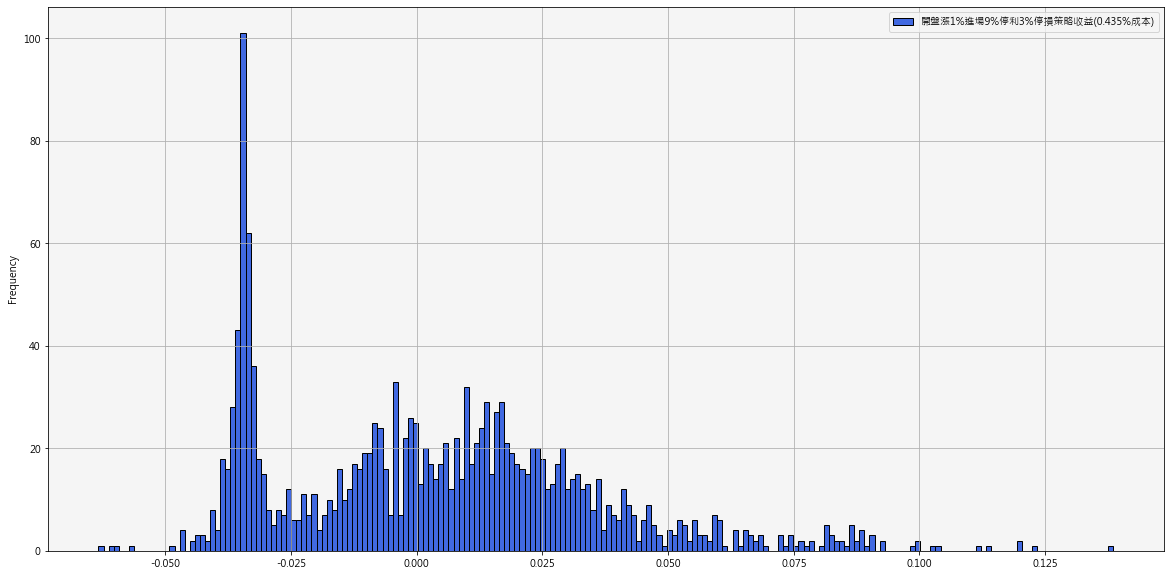

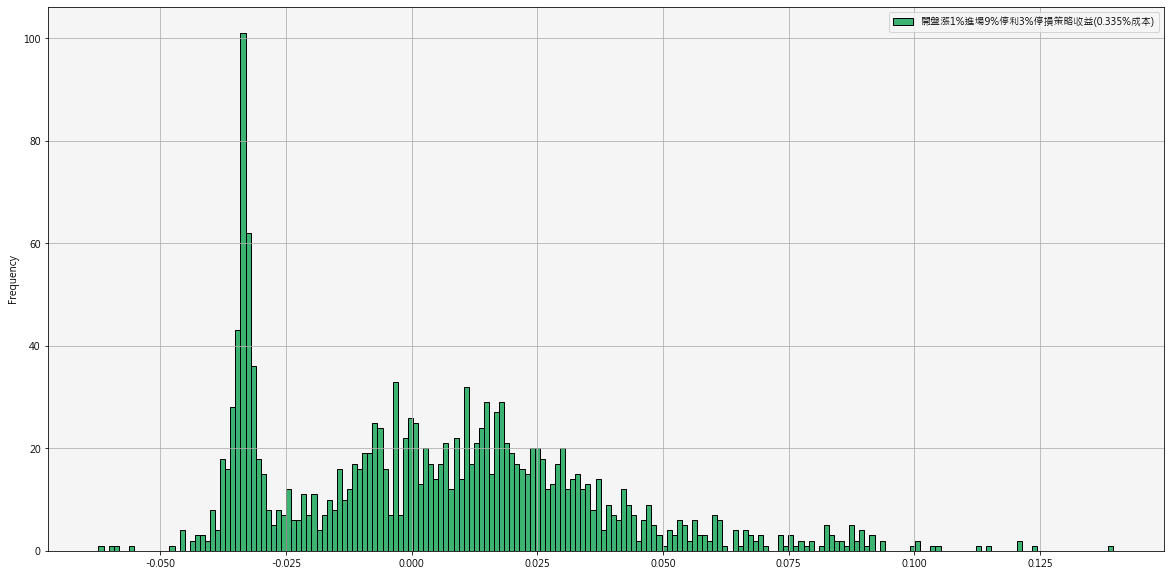

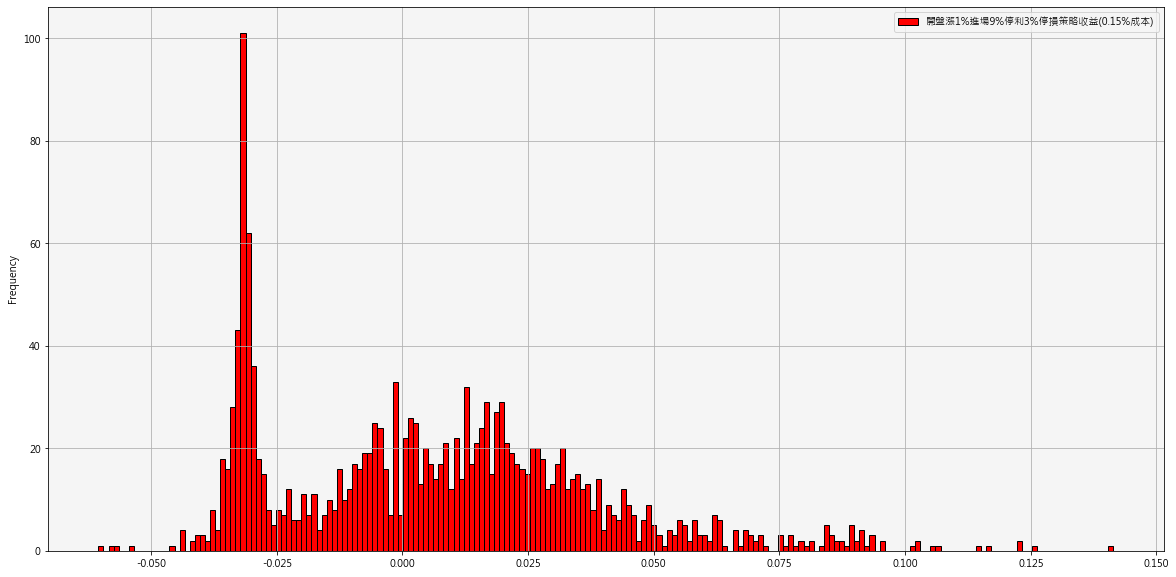

In [112]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [113]:
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.003457,0.004457,0.006307
std,0.031438,0.031438,0.031438
min,-0.063332,-0.062332,-0.060482
25%,-0.025570,-0.024570,-0.022720
50%,0.002379,0.003379,0.005229
75%,0.022680,0.023680,0.025530
max,0.138507,0.139507,0.141357


<AxesSubplot: ylabel='Frequency'>

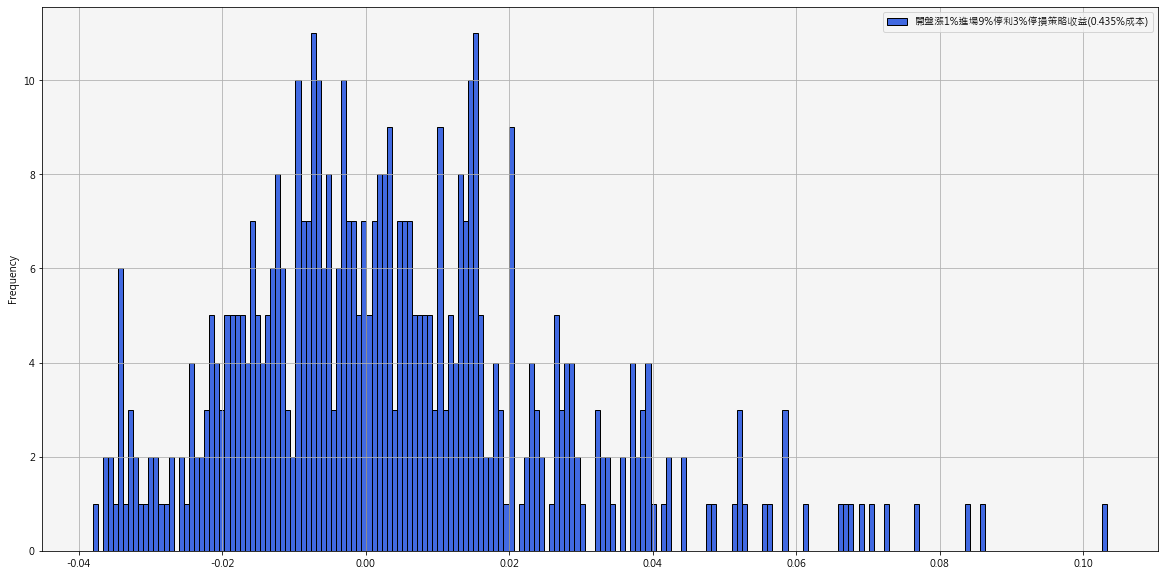

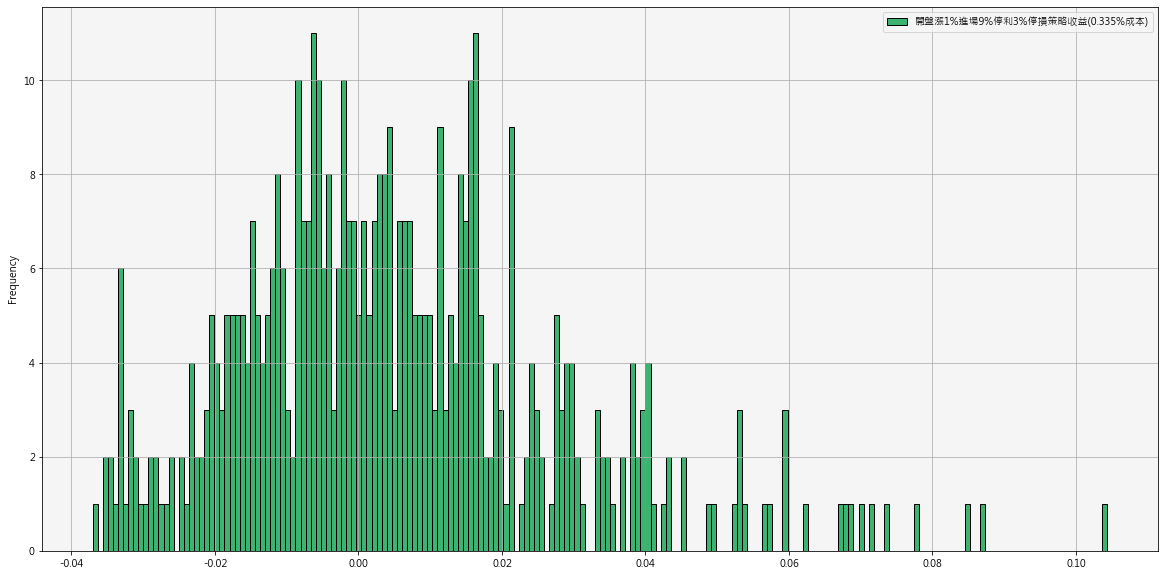

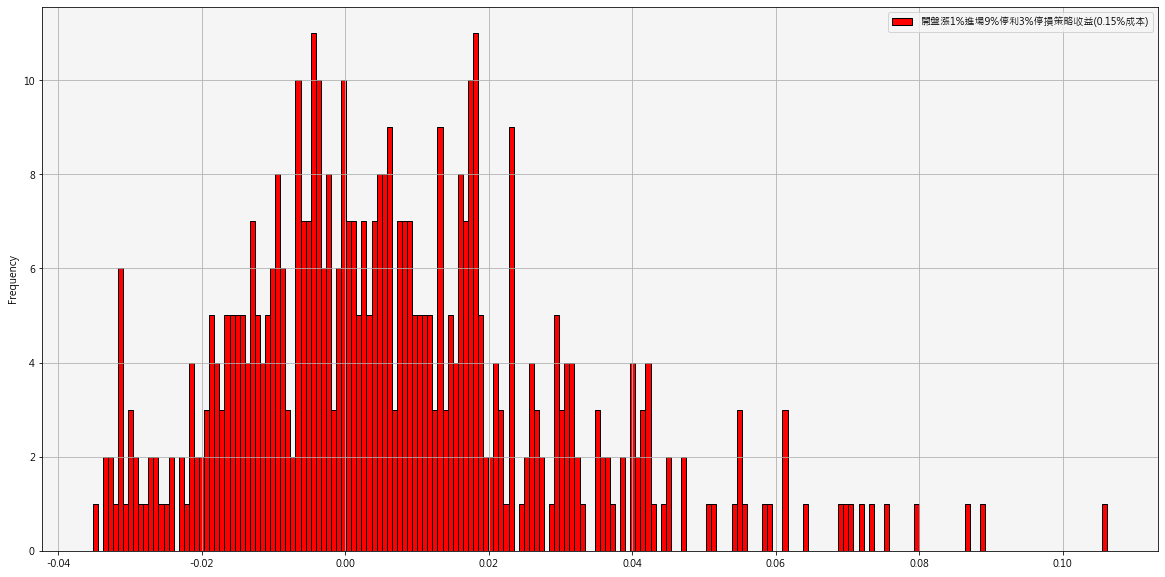

In [114]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [115]:
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.004075,0.005075,0.006925
std,0.022281,0.022281,0.022281
min,-0.038065,-0.037065,-0.035215
25%,-0.010598,-0.009598,-0.007748
50%,0.001519,0.002519,0.004369
75%,0.015026,0.016026,0.017876
max,0.103342,0.104342,0.106192


<AxesSubplot: xlabel='日期'>

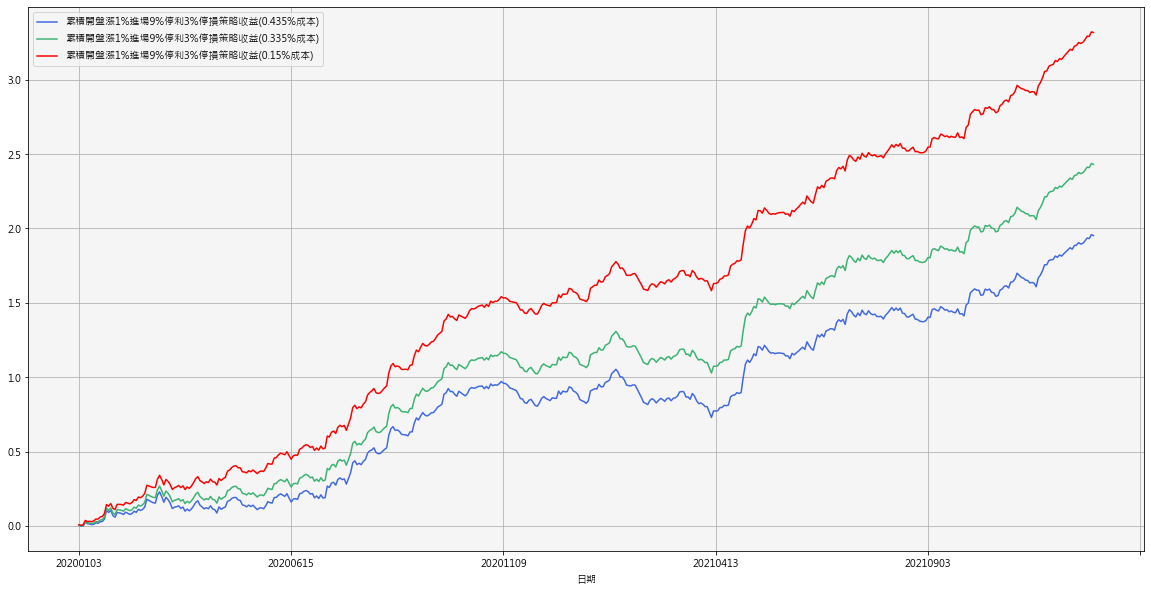

In [116]:
returns_day[['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=4>3%停利1%停損</font>**

In [8]:
transactions_short = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場3%停利1%停損_空.csv")
transactions_long = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場3%停利1%停損_多.csv")
transactions = pd.concat([transactions_short,transactions_long])
transactions.date = pd.to_datetime(transactions.date).dt.strftime("%Y%m%d")
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)

**<font  size=4>多單發訊檔數</font>**

In [169]:
pd.DataFrame(returns[returns['date'].isin(df_vix25['日期'])].groupby('date')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

date,20200303,20200310,20200311,20200312,20200313,20200316,20200317,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,20200505,20200506,20200507,20200508,20200511,20200514,20200515,20200518,20200519,20200520,20200525,20200526,20200615,20200616,20200729,20200730,20200731,20200803,20200804,20200807,20200821,20201102,20201103,20201104,20210126,20210127,20210129,20210201,20210202,20210203,20210302,20210303,20210305,20210308,20210512,20210513,20210514,20210517,20210518,20210519,20210520,20210521,20210524,20210525,20210526,20210823,20211005,20211007,20211013
多單發訊檔數,4,5,2,2,5,4,5,2,5,2,5,5,4,5,3,4,3,3,5,5,5,5,2,5,4,2,4,4,2,4,3,3,4,4,4,5,5,3,3,3,1,5,2,2,3,3,3,5,4,2,4,5,3,3,3,2,2,5,4,4,3,3,4,2,3,5,3,2,3,4,2,5,4,3,5,5,4,4,2,3,4,4,4,5,4,4


In [170]:
pd.DataFrame(returns[~(returns['date'].isin(df_vix25['日期']))].groupby('date')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).T

date,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200305,20200306,20200309,20200521,20200522,20200527,20200528,20200529,20200601,20200602,20200603,20200604,20200605,20200608,20200609,20200611,20200612,20200617,20200618,20200619,20200622,20200623,20200624,20200629,20200630,20200701,20200702,20200703,20200706,20200707,20200708,20200709,20200710,20200713,20200714,20200715,20200716,20200717,20200720,20200721,20200722,...,20210906,20210907,20210908,20210909,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211006,20211008,20211012,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229
空單發訊檔數,2,2,3,5,3,2,4,4,4,4,1,2,3,4,4,4,1,4,3,5,5,4,5,4,4,4,5,3,3,5,4,5,1,3,4,4,3,3,4,3,2,2,4,4,4,2,3,2,1,2,4,2,5,3,1,2,1,2,2,4,3,2,1,1,3,4,2,2,2,3,5,1,2,2,4,...,2,2,4,4,2,4,3,5,5,5,3,5,4,5,1,3,3,1,2,4,4,5,3,3,3,4,3,5,5,5,2,5,4,4,4,3,5,5,2,5,4,4,4,5,4,3,3,2,3,3,3,5,4,5,3,5,2,2,4,5,4,4,4,1,4,4,2,2,4,3,4,3,3,2,4


In [171]:
returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場3%停利1%停損策略收益(不加成本)'})
returns['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.00435

In [173]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場3%停利1%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場3%停利1%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場3%停利1%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

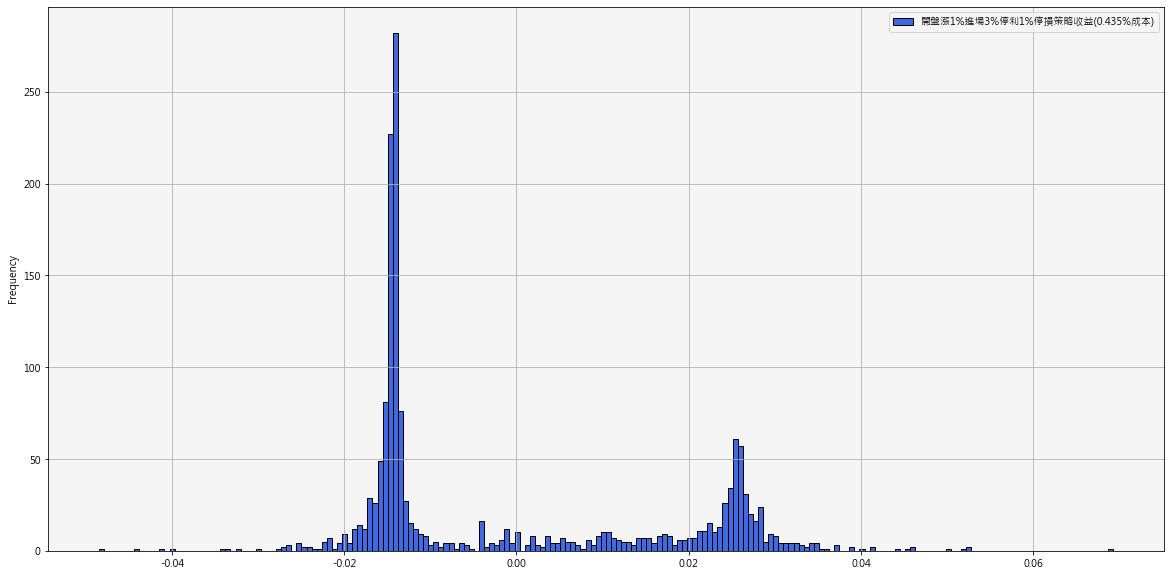

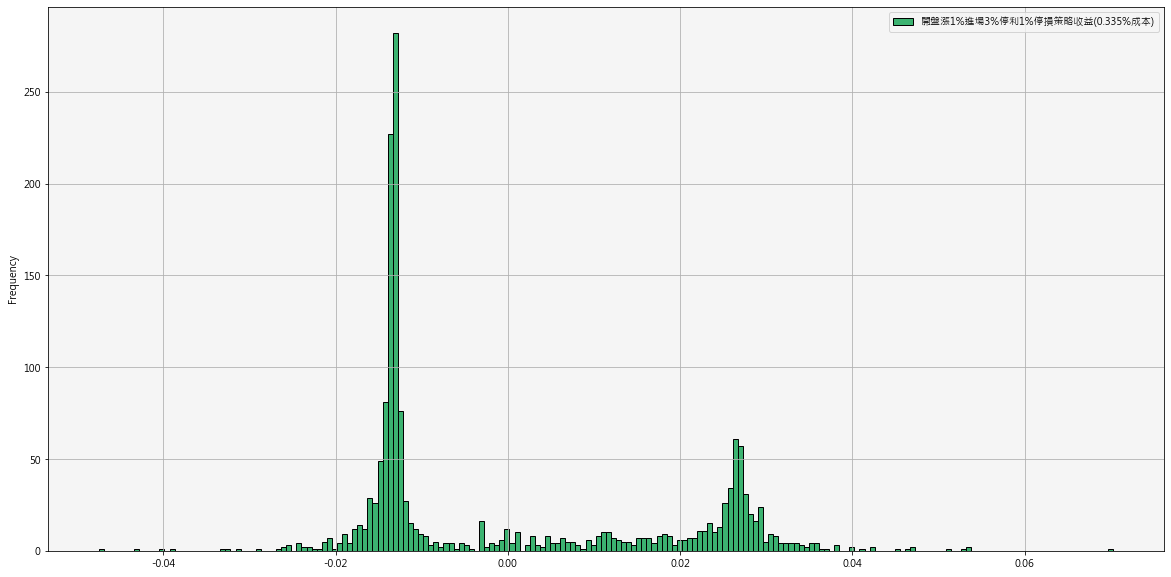

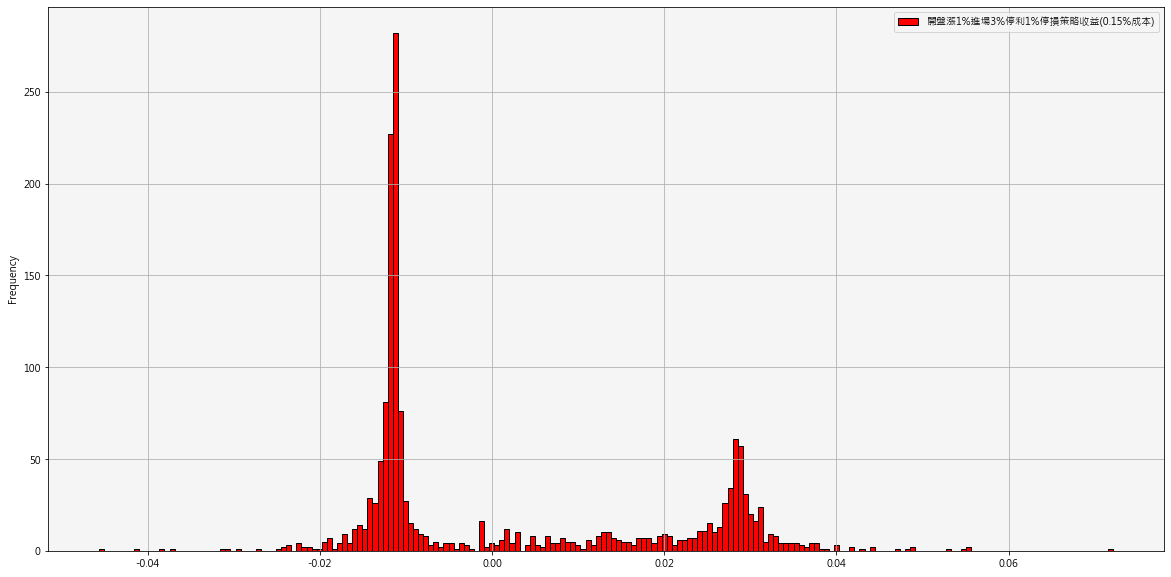

In [174]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場3%停利1%停損
############################################################################################
returns[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [175]:
returns[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場3%停利1%停損策略收益(0.435%成本),開盤漲1%進場3%停利1%停損策略收益(0.335%成本),開盤漲1%進場3%停利1%停損策略收益(0.15%成本)
mean,-0.000881,0.000119,0.001969
std,0.018626,0.018626,0.018626
min,-0.048536,-0.047536,-0.045686
25%,-0.014551,-0.013551,-0.011701
50%,-0.013702,-0.012702,-0.010852
75%,0.020798,0.021798,0.023648
max,0.069283,0.070283,0.072133


<AxesSubplot: ylabel='Frequency'>

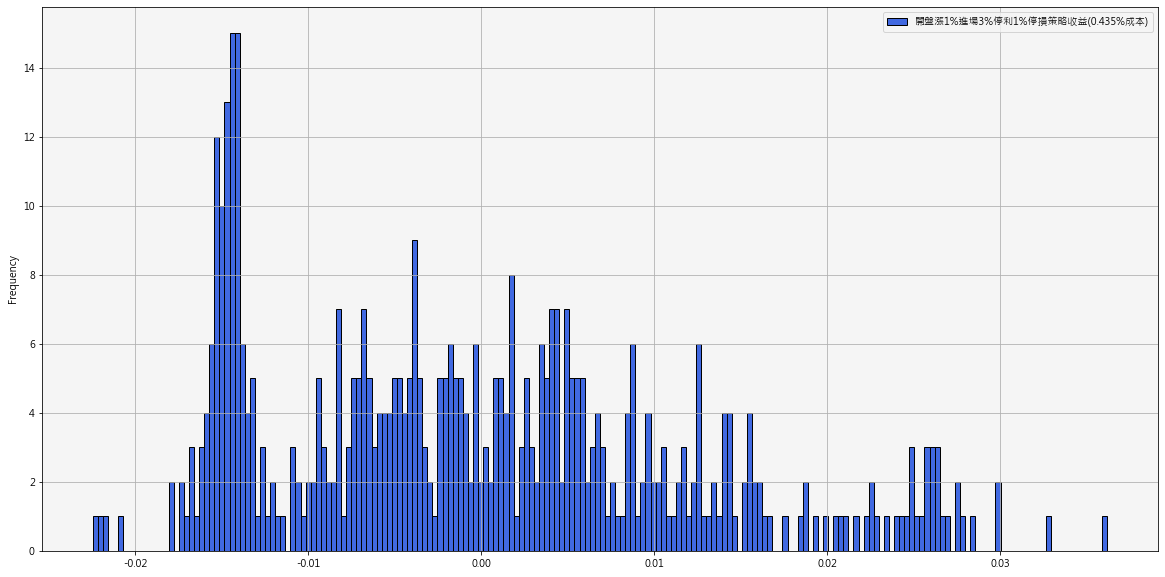

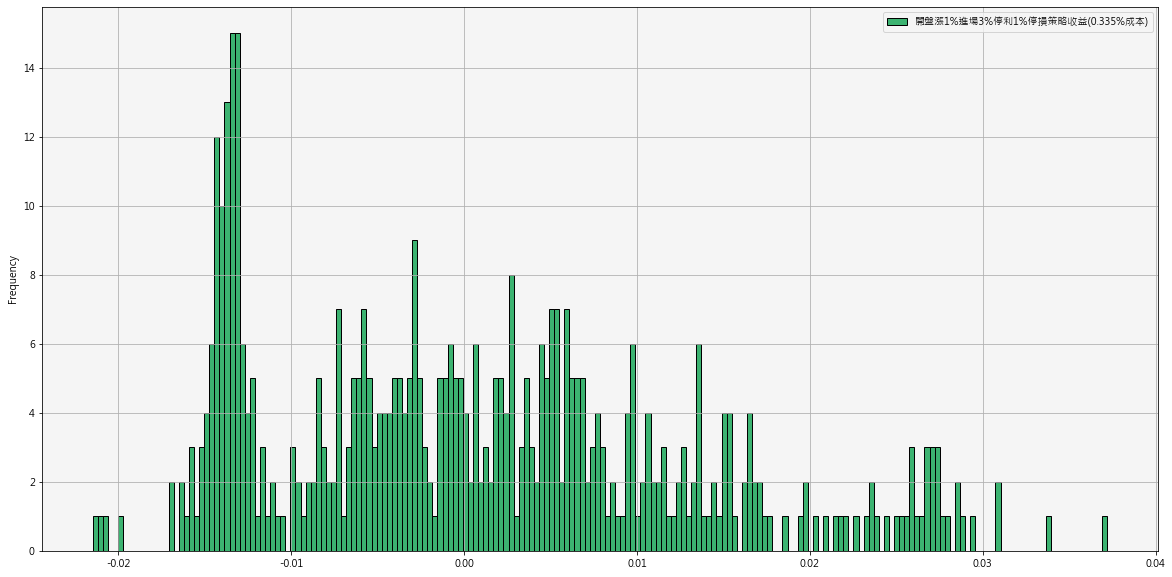

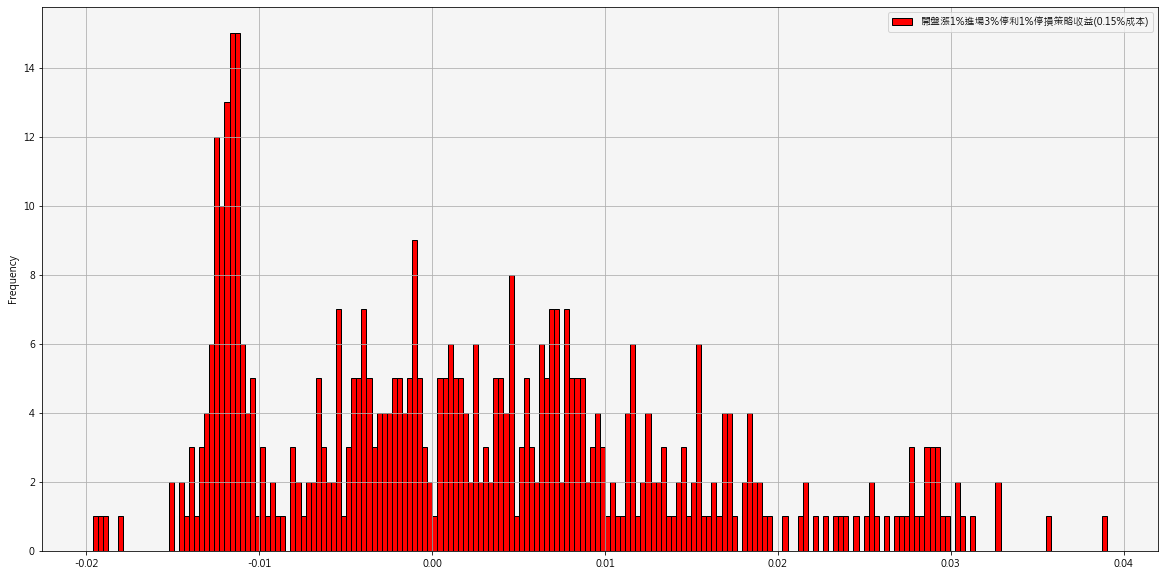

In [176]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [177]:
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場3%停利1%停損策略收益(0.435%成本),開盤漲1%進場3%停利1%停損策略收益(0.335%成本),開盤漲1%進場3%停利1%停損策略收益(0.15%成本)
mean,-0.000458,0.000542,0.002392
std,0.012035,0.012035,0.012035
min,-0.022481,-0.021481,-0.019631
25%,-0.010480,-0.009480,-0.007630
50%,-0.001663,-0.000663,0.001187
75%,0.006561,0.007561,0.009411
max,0.036190,0.037190,0.039040


<AxesSubplot: xlabel='日期'>

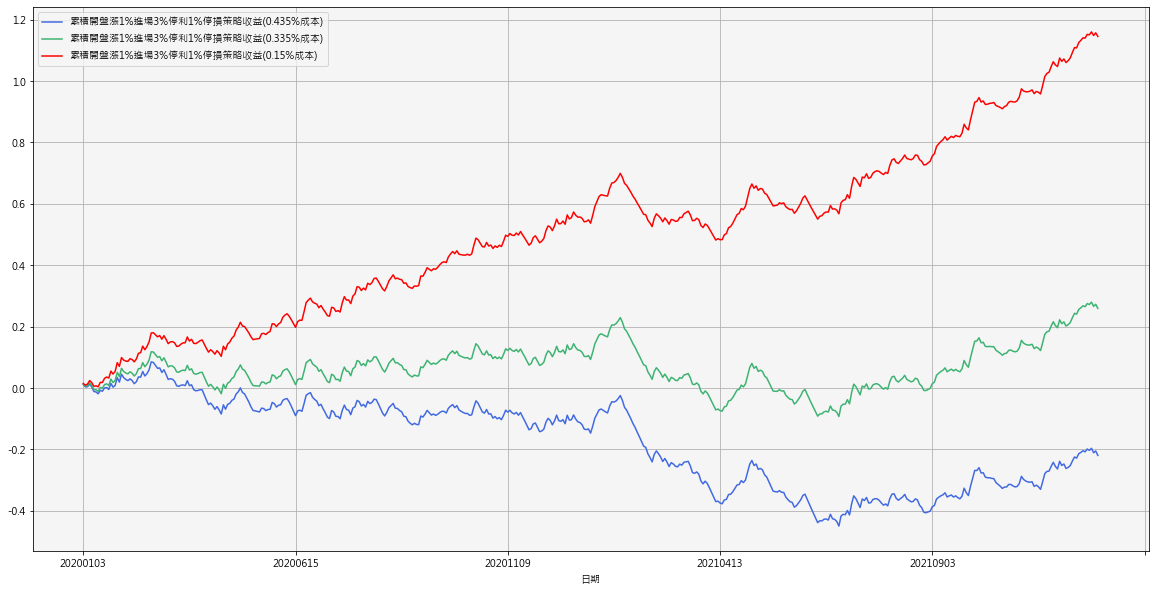

In [178]:
returns_day[['累積開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','累積開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','累積開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=6>浮動檔數</font>**

**<font  size=5>每日股票池檔數</font>**

In [9]:
pool_long = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_多.csv',index_col= 0)
pool_short = pd.read_csv(r'Z:\07個人\ChiehLin\回測股票池\新股票池_空.csv',index_col= 0)

In [10]:
pd.DataFrame(pool_long.T.count()).rename(columns={0:'檔數'}).T

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,13,2,1,5,4,28,1,1,4,11,25,9,8,5,7,3,3,5,15,4,25,39,12,1,24,2,2,39,58,5,5,3,1,4,35,5,10,23,2,9,2,11,13,30,34,2,13,42,53,11,11,8,7,14,13,3,2,6,7,5,2,11,2,3,10,3,2,8,5,7,9,11,12,7,3,...,3,26,13,3,18,3,9,2,5,3,5,4,8,18,8,1,19,6,19,3,2,3,19,25,16,8,7,49,6,36,10,5,39,15,7,8,2,4,10,23,4,9,6,17,24,8,10,15,4,5,7,20,5,3,2,5,22,26,3,6,3,1,17,5,13,2,17,4,27,23,7,1,3,6,21


In [370]:
pd.DataFrame(pd.DataFrame(pool_long.T.count()).rename(columns={0:'檔數'}).mean()).rename(columns = {0:'多單'}).rename({'檔數':'每日平均股票池檔數'}).T

,每日平均股票池檔數
多單,9.680328


In [371]:
pd.DataFrame(pool_short.T.count()).rename(columns={0:'檔數'}).T

,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,...,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211214,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230
檔數,4,10,25,8,8,3,6,10,3,5,6,4,4,15,6,15,16,10,17,9,10,10,17,25,10,12,15,15,6,13,8,15,19,30,2,9,9,14,12,12,14,24,4,8,7,5,18,1,4,3,4,7,5,1,6,16,10,10,7,17,10,1,26,18,13,18,13,11,3,8,7,11,4,14,15,...,7,5,11,7,10,15,5,10,7,9,17,4,17,6,17,9,16,12,6,16,8,24,4,12,23,16,10,12,25,16,24,8,16,19,17,22,26,8,6,6,9,13,13,17,8,13,10,7,15,10,17,11,14,19,21,8,6,8,18,9,11,24,2,23,8,9,9,2,12,5,8,15,12,8,4


In [372]:
pd.DataFrame(pd.DataFrame(pool_short.T.count()).rename(columns={0:'檔數'}).mean()).rename(columns = {0:'空單'}).rename({'檔數':'每日平均股票池檔數'}).T

,每日平均股票池檔數
空單,13.354508


**<font  size=5>開盤漲1%進場(浮動檔數)(多單VIX大於25)(空單不設限VIX)</font>**

**<font  size=4>9%停利3%停損</font>**

In [149]:
transactions_long = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\開盤1%進場9%停利3%停損_多_215VIX.csv")
transactions_short = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\開盤1%進場9%停利3%停損_空_215VIX.csv")
transactions_long.date = pd.to_datetime(transactions_long.date).dt.strftime("%Y%m%d")
transactions_short.date = pd.to_datetime(transactions_short.date).dt.strftime("%Y%m%d")
transactions_long = transactions_long[transactions_long['date'].isin(df_vix25['日期'])].reset_index(drop = True)

In [150]:
returns_long = transactions_long.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns_long['returns'] =returns_long['value']/(transactions_long[transactions_long['value'] < 0].reset_index(drop = True)['value'])*-1
returns_short = transactions_short.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns_short['returns'] =returns_short['value']/transactions_short[transactions_short['value'] > 0].reset_index(drop = True)['value']
returns =  pd.concat([returns_long, returns_short])



In [13]:
# transactions =  pd.concat([transactions_long, transactions_short])
# returns_long = transactions_long.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
# returns_long['returns'] =returns_long['value']/(transactions_long[transactions_long['value'] < 0].reset_index(drop = True)['value'])*-1
# returns_short = transactions_short.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
# returns_short['returns'] =returns_short['value']/transactions_short[transactions_short['value'] > 0].reset_index(drop = True)['value']
# returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
# returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']

In [154]:
returns_long['returns(加成本0.15%)'] = returns_long['returns']-0.0015
returns_long['returns(加成本0.335%)'] = returns_long['returns']-0.00335
returns_long['returns(加成本0.435%)'] = returns_long['returns']-0.00435
returns_short['returns(加成本0.15%)'] = returns_short['returns']-0.0015
returns_short['returns(加成本0.335%)'] = returns_short['returns']-0.00335
returns_short['returns(加成本0.435%)'] = returns_short['returns']-0.00435

In [305]:
# returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
# returns['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
# returns['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
# returns['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435
# returns_long = returns_long.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)(多單)'})
# returns_long['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns_long['開盤漲1%進場9%停利3%停損策略收益(不加成本)(多單)'] - 0.0015
# returns_long['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns_long['開盤漲1%進場9%停利3%停損策略收益(不加成本)(多單)'] - 0.00335
# returns_long['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns_long['開盤漲1%進場9%停利3%停損策略收益(不加成本)(多單)'] - 0.00435
# returns_short = returns_short.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)(空單)'})
# returns_short['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns_short['開盤漲1%進場9%停利3%停損策略收益(不加成本)(空單)'] - 0.0015
# returns_short['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns_short['開盤漲1%進場9%停利3%停損策略收益(不加成本)(空單)'] - 0.00335
# returns_short['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns_short['開盤漲1%進場9%停利3%停損策略收益(不加成本)(空單)'] - 0.00435

In [155]:
returns = returns.rename(columns = {'date':'日期','returns' :'策略組合收益(不加成本)'})
returns['策略組合收益(0.15%成本)'] =  returns['策略組合收益(不加成本)'] - 0.0015
returns['策略組合收益(0.335%成本)'] =  returns['策略組合收益(不加成本)'] - 0.00335
returns['策略組合收益(0.435%成本)'] =  returns['策略組合收益(不加成本)'] - 0.00435
returns_long = returns_long.rename(columns = {'date':'日期','returns' :'策略多單收益(不加成本)'})
returns_long['策略多單收益(0.15%成本)'] =  returns_long['策略多單收益(不加成本)'] - 0.0015
returns_long['策略多單收益(0.335%成本)'] =  returns_long['策略多單收益(不加成本)'] - 0.00335
returns_long['策略多單收益(0.435%成本)'] =  returns_long['策略多單收益(不加成本)'] - 0.00435
returns_short = returns_short.rename(columns = {'date':'日期','returns' :'策略空單收益(不加成本)'})
returns_short['策略空單收益(0.15%成本)'] =  returns_short['策略空單收益(不加成本)'] - 0.0015
returns_short['策略空單收益(0.335%成本)'] =  returns_short['策略空單收益(不加成本)'] - 0.00335
returns_short['策略空單收益(0.435%成本)'] =  returns_short['策略空單收益(不加成本)'] - 0.00435

In [156]:
returns_day = returns.groupby('日期').agg({'策略組合收益(0.15%成本)':'mean', '策略組合收益(0.335%成本)': 'mean', '策略組合收益(0.435%成本)':'mean'})
returns_long_day = returns_long.groupby('日期').agg({'策略多單收益(0.15%成本)':'mean', '策略多單收益(0.335%成本)': 'mean', '策略多單收益(0.435%成本)':'mean'})
returns_short_day = returns_short.groupby('日期').agg({'策略空單收益(0.15%成本)':'mean', '策略空單收益(0.335%成本)': 'mean', '策略空單收益(0.435%成本)':'mean'})

In [157]:
returns_day['累積策略組合收益(0.15%成本)'] = returns_day['策略組合收益(0.15%成本)'].cumsum()
returns_day['累積策略組合收益(0.335%成本)'] = returns_day['策略組合收益(0.335%成本)'].cumsum()
returns_day['累積策略組合收益(0.435%成本)'] = returns_day['策略組合收益(0.435%成本)'].cumsum()
returns_long_day['累積策略多單收益(0.15%成本)'] = returns_long_day['策略多單收益(0.15%成本)'].cumsum()
returns_long_day['累積策略多單收益(0.335%成本)'] = returns_long_day['策略多單收益(0.335%成本)'].cumsum()
returns_long_day['累積策略多單收益(0.435%成本)'] = returns_long_day['策略多單收益(0.435%成本)'].cumsum()
returns_short_day['累積策略空單收益(0.15%成本)'] = returns_short_day['策略空單收益(0.15%成本)'].cumsum()
returns_short_day['累積策略空單收益(0.335%成本)'] = returns_short_day['策略空單收益(0.335%成本)'].cumsum()
returns_short_day['累積策略空單收益(0.435%成本)'] = returns_short_day['策略空單收益(0.435%成本)'].cumsum()

**<font  size=4>多單發訊檔數</font>**

In [158]:
pd.DataFrame(returns_long.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).T

日期,20200303,20200310,20200312,20200313,20200316,20200317,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200330,20200331,20200401,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,20200505,20200506,20200508,20200511,20200514,20200515,20200518,20200519,20200520,20200526,20200615,20200616,20200729,20200731,20200804,20200807,20200821,20201102,20201103,20201104,20210127,20210201,20210202,20210203,20210302,20210303,20210305,20210512,20210513,20210517,20210518,20210519,20210520,20210521,20210524,20210526,20210823,20211005,20211013
多單發訊檔數,5,5,2,5,5,5,4,5,5,5,5,2,2,2,5,1,2,3,2,2,3,2,1,4,1,3,3,3,2,5,3,2,2,3,5,1,2,2,4,1,3,1,1,3,4,2,1,5,1,1,5,1,2,1,1,3,2,2,1,2,2,6,2,2,2,3,2,5,3,3,2,2,1


<AxesSubplot: xlabel='日期'>

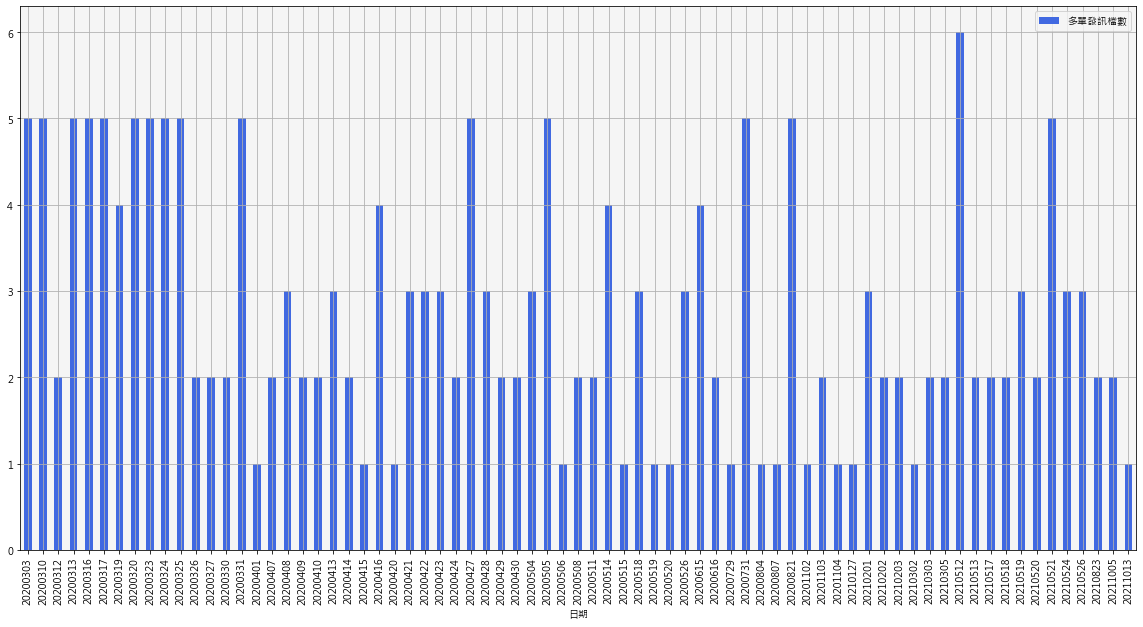

In [159]:
pd.DataFrame(returns_long.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).plot(kind = 'bar',figsize=(20, 10),color = ['royalblue'],grid = True)

In [160]:
pd.DataFrame(pd.DataFrame(returns_long.groupby('日期')['symbol'].count()).rename(columns={'symbol':'多單發訊檔數'}).mean()).rename(columns = {0:'多單'}).rename({'多單發訊檔數':'每日平均發訊檔數(VIX >25)'}).T

,每日平均發訊檔數(VIX >25)
多單,2.753425


**<font  size=4>多單勝率</font>**

In [161]:
pd.concat([pd.DataFrame.from_dict({'多單勝率':len(returns_long[returns_long['returns(加成本0.15%)']>0])/len(returns_long)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'多單勝率':len(returns_long[returns_long['returns(加成本0.335%)']>0])/len(returns_long)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'多單勝率':len(returns_long[returns_long['returns(加成本0.435%)']>0])/len(returns_long)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])


,多單勝率
勝率(加成本0.15%),0.517413
勝率(加成本0.335%),0.457711
勝率(加成本0.435%),0.442786


In [162]:
pd.concat([pd.DataFrame.from_dict({'多單每日平均勝率':len(returns_long_day[returns_long_day['策略多單收益(0.15%成本)'] >0 ])/len(returns_long_day)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'多單每日平均勝率':len(returns_long_day[returns_long_day['策略多單收益(0.335%成本)'] >0 ])/len(returns_long_day)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'多單每日平均勝率':len(returns_long_day[returns_long_day['策略多單收益(0.435%成本)'] >0 ])/len(returns_long_day)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])

,多單每日平均勝率
勝率(加成本0.15%),0.506849
勝率(加成本0.335%),0.465753
勝率(加成本0.435%),0.410959


**<font  size=4>多單損益</font>**

<AxesSubplot: ylabel='Frequency'>

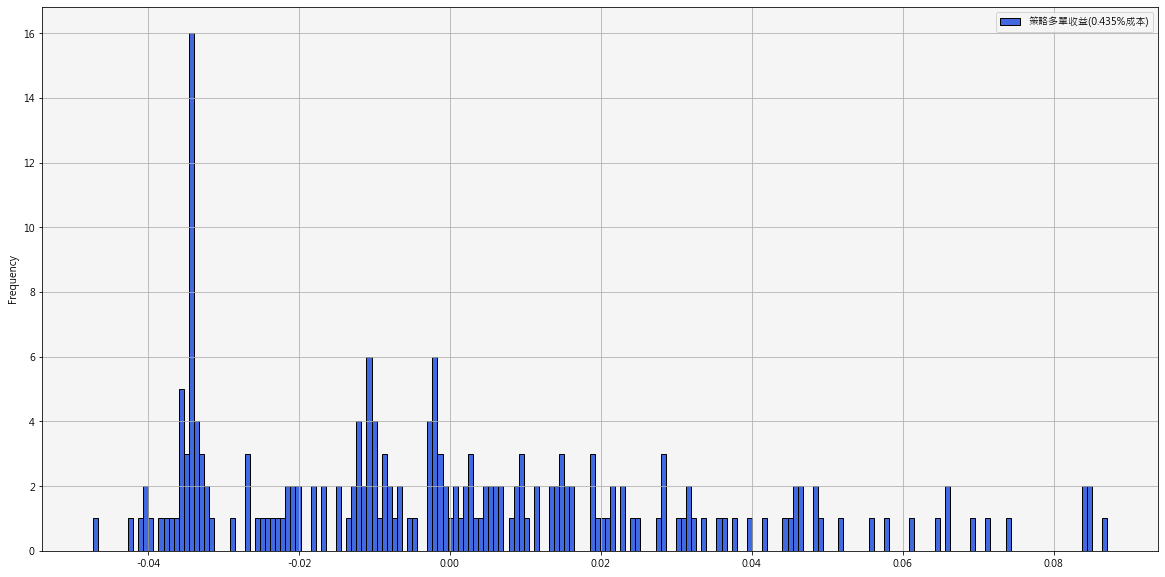

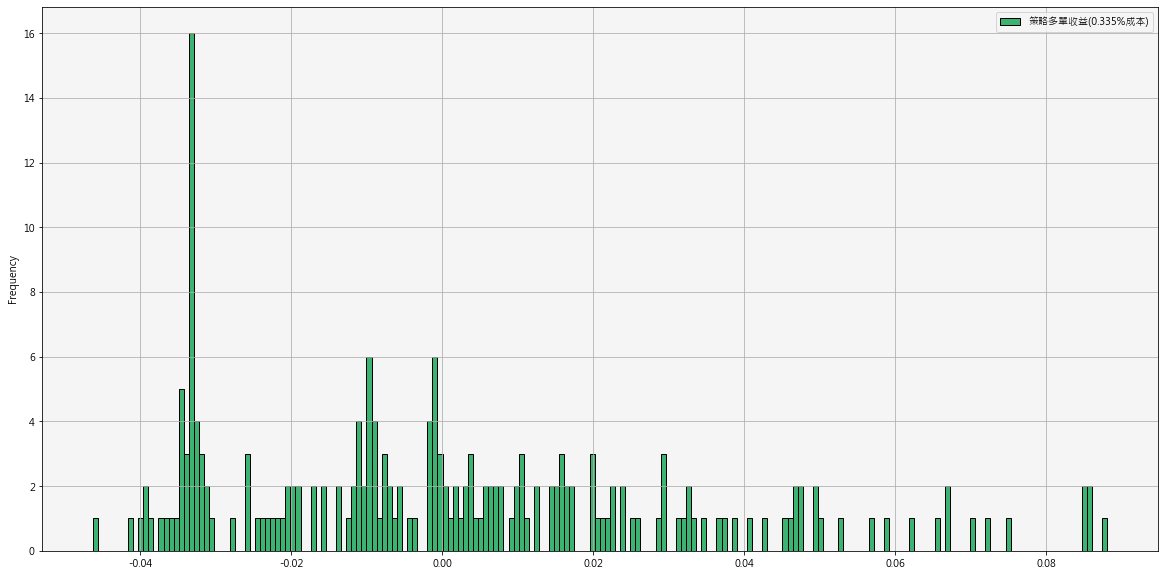

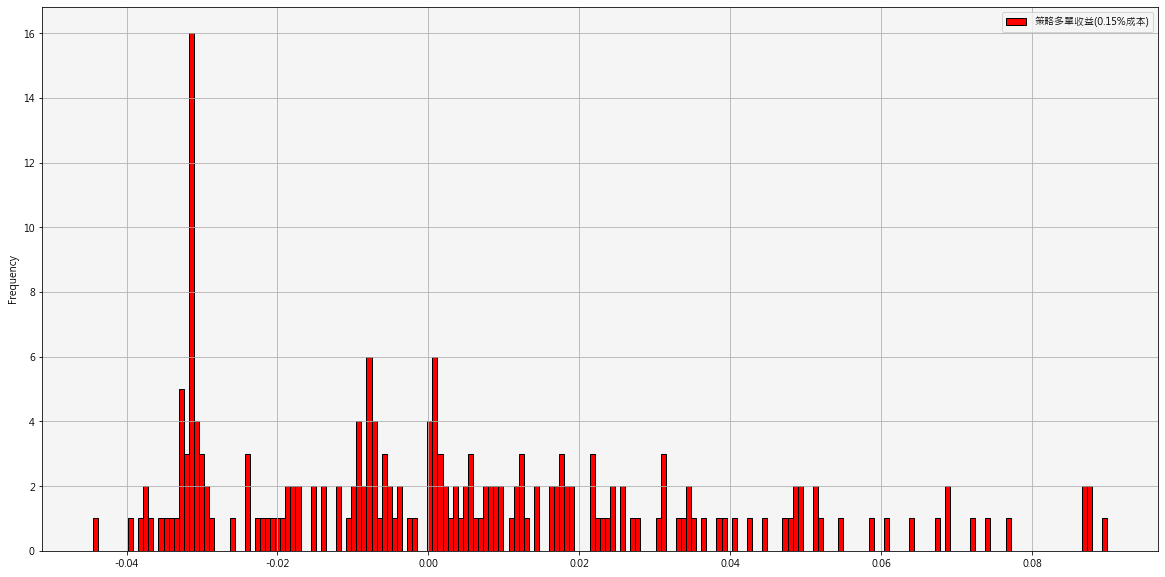

In [163]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_long[['策略多單收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_long[['策略多單收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_long[['策略多單收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [164]:
returns_long[['策略多單收益(0.435%成本)','策略多單收益(0.335%成本)','策略多單收益(0.15%成本)']].describe().iloc[1:,:]

,策略多單收益(0.435%成本),策略多單收益(0.335%成本),策略多單收益(0.15%成本)
mean,0.000936,0.001936,0.003786
std,0.030964,0.030964,0.030964
min,-0.047349,-0.046349,-0.044499
25%,-0.024460,-0.023460,-0.021610
50%,-0.002302,-0.001302,0.000548
75%,0.018805,0.019805,0.021655
max,0.087067,0.088067,0.089917


<AxesSubplot: ylabel='Frequency'>

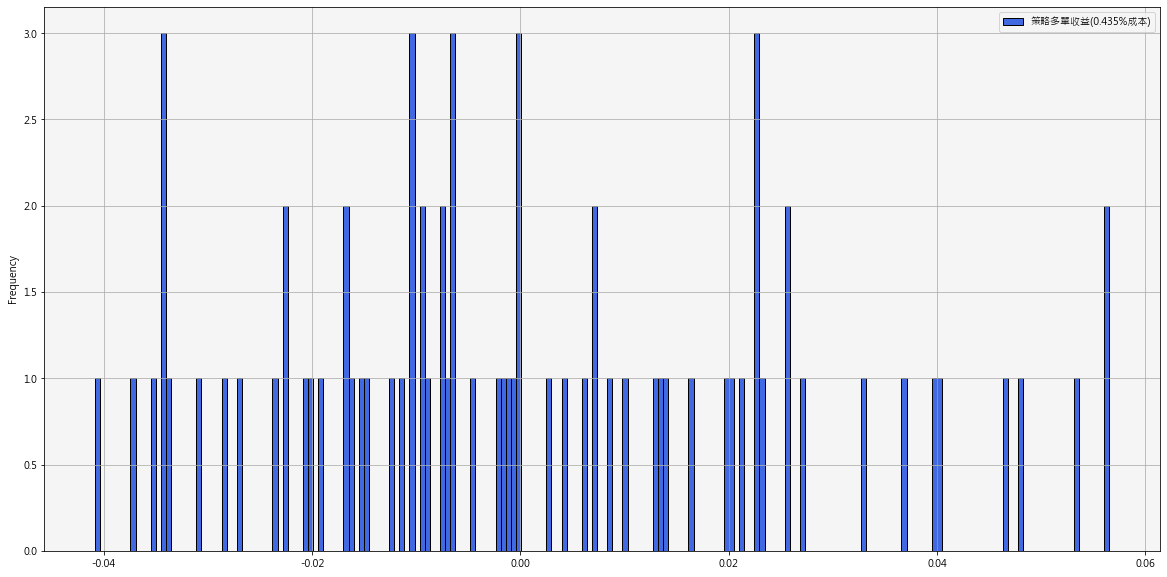

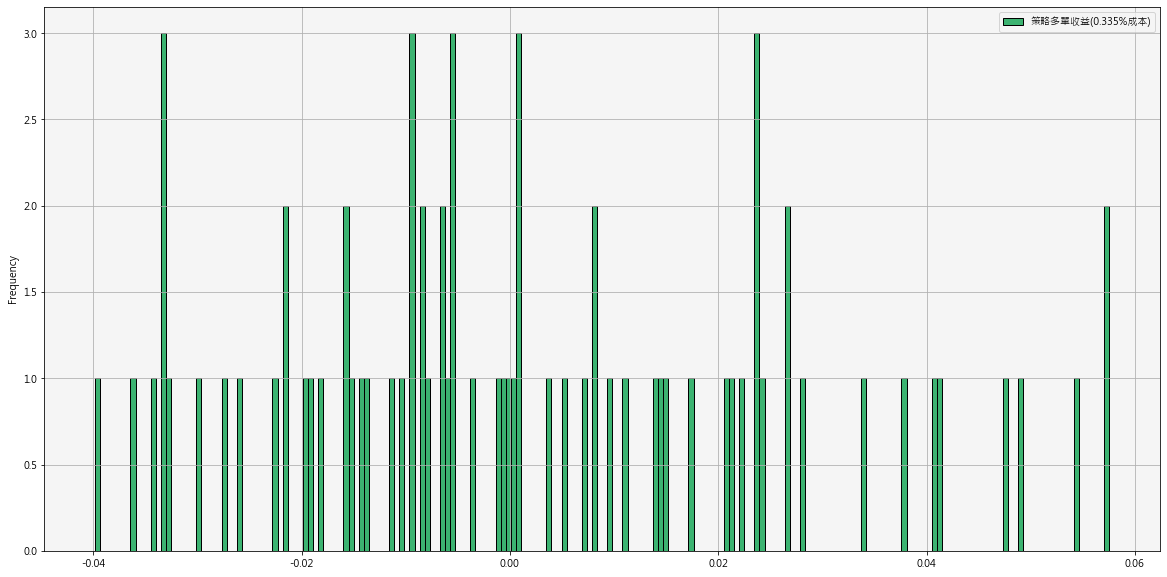

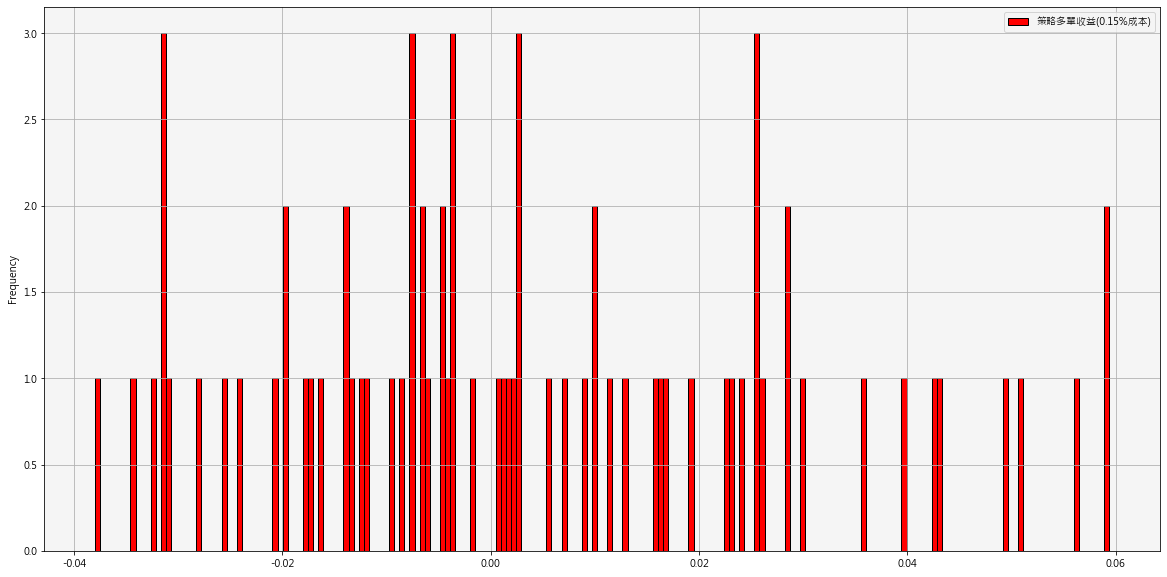

In [165]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_long_day[['策略多單收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_long_day[['策略多單收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_long_day[['策略多單收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [166]:
returns_long_day[['策略多單收益(0.435%成本)','策略多單收益(0.335%成本)','策略多單收益(0.15%成本)']].describe().iloc[1:,:]

,策略多單收益(0.435%成本),策略多單收益(0.335%成本),策略多單收益(0.15%成本)
mean,0.000897,0.001897,0.003747
std,0.024285,0.024285,0.024285
min,-0.040836,-0.039836,-0.037986
25%,-0.016053,-0.015053,-0.013203
50%,-0.001929,-0.000929,0.000921
75%,0.019924,0.020924,0.022774
max,0.056562,0.057562,0.059412


<AxesSubplot: xlabel='日期'>

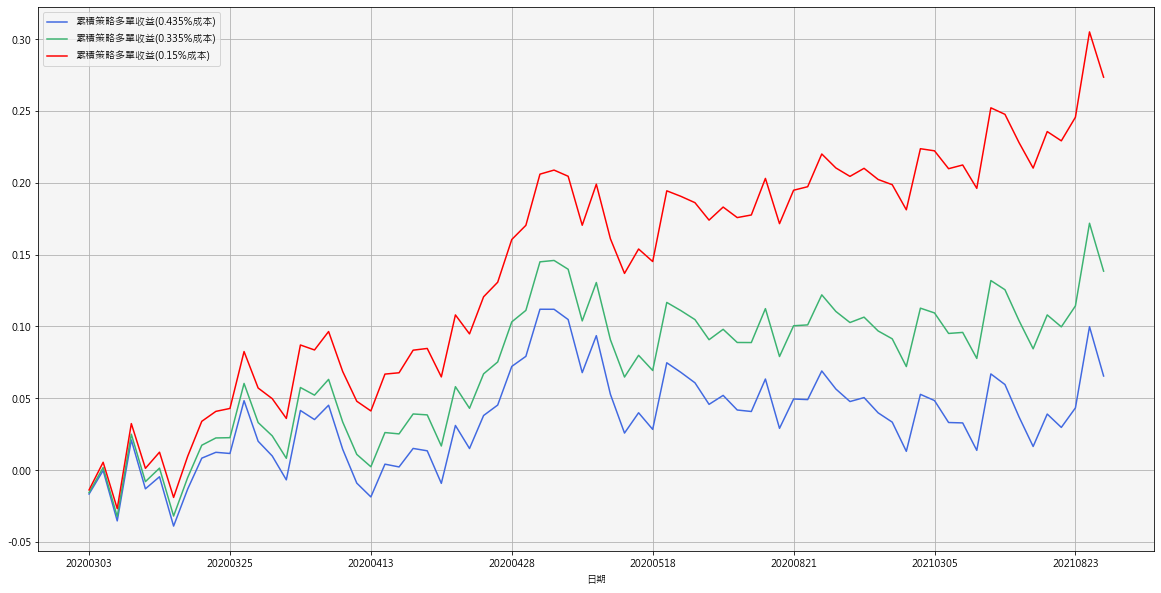

In [167]:
returns_long_day[['累積策略多單收益(0.435%成本)','累積策略多單收益(0.335%成本)','累積策略多單收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=3>多單各年度收益統計</font>**

In [168]:
import pyfolio as pf
import empyrical as ep
from pyfolio.deprecate import deprecated
from pyfolio.interesting_periods import PERIODS
from pyfolio.txn import get_turnover
from pyfolio.utils import APPROX_BDAYS_PER_MONTH, APPROX_BDAYS_PER_YEAR
from pyfolio.utils import DAILY
import scipy.stats as stats
returns_day.index = pd.to_datetime(returns_day.index)

def value_at_risk(returns, period=None, sigma=2.0):
  
    if period is not None:
        returns_agg = ep.aggregate_returns(returns, period)
    else:
        returns_agg = returns.copy()

    value_at_risk = returns_agg.mean() - sigma * returns_agg.std()
    return value_at_risk


SIMPLE_STAT_FUNCS = [
    ep.annual_return,
    ep.cum_returns_final,
    ep.annual_volatility,
    ep.sharpe_ratio,
    ep.calmar_ratio,
    ep.stability_of_timeseries,
    ep.max_drawdown,
    ep.omega_ratio,
    ep.sortino_ratio,
    stats.skew,
    stats.kurtosis,
    ep.tail_ratio,
    value_at_risk
]
STAT_FUNC_NAMES = {
    'annual_return': '年化收益',
    'cum_returns_final': '累積收益',
    'annual_volatility': '年化波動度',
    'sharpe_ratio': '夏普比率',
    'calmar_ratio': 'Calmar 比率',
    'stability_of_timeseries': '穩定度',
    'max_drawdown': '最大回撤',
    'omega_ratio': 'Omega 比率',
    'sortino_ratio': 'Sortino 比率',
    'skew': '偏度',
    'kurtosis': '峰度',
    'tail_ratio': '尾部比率',
    'common_sense_ratio': 'Common sense 比率',
    'value_at_risk': 'Daily value at risk',
    'alpha': 'Alpha',
    'beta': 'Beta',
}

def make_stats(returns,returns_org,colname):
    df_stats = pd.DataFrame()
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[returns.index <='20210101'][colname + '(0.435%成本)'])
    df_stats[colname + '(0.435%成本)'] = stats
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[returns.index <='20210101'][colname +'(0.335%成本)'])
    df_stats[colname +'(0.335%成本)'] = stats
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[returns.index <='20210101'][colname +'(0.15%成本)'])
    df_stats[colname +'(0.15%成本)'] = stats
    df_stats = df_stats.T
    df_stats['年化收益'] = df_stats['年化收益'].mul(100).round(2).astype(str).add(' %')
    df_stats['累積收益'] = df_stats['累積收益'].mul(100).round(2).astype(str).add(' %')
    df_stats['年化波動度'] = df_stats['年化波動度'].mul(100).round(2).astype(str).add(' %')
    df_stats['最大回撤'] = df_stats['最大回撤'].mul(100).round(2).astype(str).add(' %')
    df_stats['Daily value at risk'] = df_stats['Daily value at risk'].mul(100).round(2).astype(str).add(' %')
    df_stats_2020 = df_stats.T
    df_stats_2020.columns = [['2020年','2020年','2020年'],list(df_stats_2020.columns)]
    df_stats = pd.DataFrame()
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[returns.index >='20210101'][colname + '(0.435%成本)'])
    df_stats[colname + '(0.435%成本)'] = stats
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[returns.index >='20210101'][colname +'(0.335%成本)'])
    df_stats[colname +'(0.335%成本)'] = stats
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[returns.index >='20210101'][colname +'(0.15%成本)'])
    df_stats[colname +'(0.15%成本)'] = stats
    df_stats = df_stats.T
    df_stats['年化收益'] = df_stats['年化收益'].mul(100).round(2).astype(str).add(' %')
    df_stats['累積收益'] = df_stats['累積收益'].mul(100).round(2).astype(str).add(' %')
    df_stats['年化波動度'] = df_stats['年化波動度'].mul(100).round(2).astype(str).add(' %')
    df_stats['最大回撤'] = df_stats['最大回撤'].mul(100).round(2).astype(str).add(' %')
    df_stats['Daily value at risk'] = df_stats['Daily value at risk'].mul(100).round(2).astype(str).add(' %')
    df_stats_2021 = df_stats.T
    df_stats_2021.columns = [['2021年','2021年','2021年'],list(df_stats_2021.columns)]
    df_stats = pd.DataFrame()
    df_stats = pd.DataFrame()
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[colname + '(0.435%成本)'])
    df_stats[colname + '(0.435%成本)'] = stats
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[colname +'(0.335%成本)'])
    df_stats[colname +'(0.335%成本)'] = stats
    stats = pd.Series()
    for stat_func in SIMPLE_STAT_FUNCS:
        stats[STAT_FUNC_NAMES[stat_func.__name__]] = stat_func(returns[colname +'(0.15%成本)'])
    df_stats[colname +'(0.15%成本)'] = stats
    df_stats = df_stats.T
    df_stats['年化收益'] = df_stats['年化收益'].mul(100).round(2).astype(str).add(' %')
    df_stats['累積收益'] = df_stats['累積收益'].mul(100).round(2).astype(str).add(' %')
    df_stats['年化波動度'] = df_stats['年化波動度'].mul(100).round(2).astype(str).add(' %')
    df_stats['最大回撤'] = df_stats['最大回撤'].mul(100).round(2).astype(str).add(' %')
    df_stats['Daily value at risk'] = df_stats['Daily value at risk'].mul(100).round(2).astype(str).add(' %')
    df_stats_all = df_stats.T
    df_stats_all.columns = [['All','All','All'],list(df_stats_all.columns)]
    df_stats_ed = pd.concat([df_stats_2020,df_stats_2021,df_stats_all],axis = 1)
    df_stats_ed = df_stats_ed.T
    df_stats_ed['總交易次數'] =  [len(returns_org[returns_org['日期'] <= '20201213']),len(returns_org[returns_org['日期'] <= '20201213']),len(returns_org[returns_org['日期'] <= '20201213']),
                                len(returns_org[returns_org['日期'] > '20201213']),len(returns_org[returns_org['日期'] > '20201213']),len(returns_org[returns_org['日期'] > '20201213']),
                                len(returns_org),len(returns_org),len(returns_org)]
    df_stats_ed['勝率'] = [len(returns_org[returns_org['日期'] <= '20201213'][returns_org[returns_org['日期'] <= '20201213'][colname+'(0.435%成本)']>=0])/len(returns_org[returns_org['日期'] <= '20201213']),
                            len(returns_org[returns_org['日期'] <= '20201213'][returns_org[returns_org['日期'] <= '20201213'][colname+'(0.335%成本)']>=0])/len(returns_org[returns_org['日期'] <= '20201213']),
                            len(returns_org[returns_org['日期'] <= '20201213'][returns_org[returns_org['日期'] <= '20201213'][colname + '(0.15%成本)']>=0])/len(returns_org[returns_org['日期'] <= '20201213']) ,
                            len(returns_org[returns_org['日期'] > '20201213'][returns_org[returns_org['日期'] > '20201213'][colname+ '(0.435%成本)']>=0])/len(returns_org[returns_org['日期'] > '20201213']),
                            len(returns_org[returns_org['日期'] > '20201213'][returns_org[returns_org['日期'] > '20201213'][colname+ '(0.335%成本)']>=0])/len(returns_org[returns_org['日期'] > '20201213']),
                            len(returns_org[returns_org['日期'] > '20201213'][returns_org[returns_org['日期'] > '20201213'][colname + '(0.15%成本)']>=0])/len(returns_org[returns_org['日期'] > '20201213']) ,
                            len(returns_org[returns_org[colname +'(0.435%成本)']>=0])/len(returns_org) ,
                            len(returns_org[returns_org[colname + '(0.335%成本)']>=0])/len(returns_org) ,
                            len(returns_org[returns_org[colname + '(0.15%成本)']>=0])/len(returns_org)]
    df_stats_ed['勝率'] = df_stats_ed['勝率'].mul(100).round(2).astype(str).add(' %')
    df_stats_ed = df_stats_ed.T

    return df_stats_ed

In [169]:
make_stats(returns_long_day,returns_long,'策略多單收益')

2020年                                   \
                    策略多單收益(0.435%成本) 策略多單收益(0.335%成本) 策略多單收益(0.15%成本)   
年化收益                         21.15 %          55.84 %        148.12 %   
累積收益                           4.2 %           9.97 %          21.5 %   
年化波動度                        38.17 %          38.17 %         38.17 %   
夏普比率                        0.689463         1.349672        2.571059   
Calmar 比率                   2.498382          6.98132       20.775453   
穩定度                         0.339472         0.629501        0.851037   
最大回撤                         -8.47 %           -8.0 %         -7.13 %   
Omega 比率                    1.112892         1.234233        1.494484   
Sortino 比率                  1.062549         2.161323        4.429674   
偏度                           0.23343          0.23343         0.23343   
峰度                         -0.640385        -0.640385       -0.640385   
尾部比率                        1.225511         1.291706        1.425155   
Daily value at risk           -4.7 %           -4.6 %         -4.42 %   
總交易次數                            155              155             155   
勝率                           45.16 %           47.1 %          52.9 %   

                               2021年                                   \
                    策略多單收益(0.435%成本) 策略多單收益(0.335%成本) 策略多單收益(0.15%成本)   
年化收益                          4.41 %          34.32 %        113.91 %   
累積收益                          0.33 %           2.25 %           5.9 %   
年化波動度                        40.67 %          40.67 %         40.67 %   
夏普比率                        0.295381         0.914994        2.061279   
Calmar 比率                   0.885974         7.328342       27.487817   
穩定度                         0.042841          0.19924        0.515238   
最大回撤                         -4.97 %          -4.68 %         -4.14 %   
Omega 比率                    1.050522         1.168006        1.436506   
Sortino 比率                  0.556485         1.815536        4.522452   
偏度                          1.045781         1.045781        1.045781   
峰度                          0.081394         0.081394        0.081394   
尾部比率                        2.256238         2.399468        2.700603   
Daily value at risk          -5.08 %          -4.98 %         -4.79 %   
總交易次數                             46               46              46   
勝率                            41.3 %           41.3 %         47.83 %   

                                 All                                   
                    策略多單收益(0.435%成本) 策略多單收益(0.335%成本) 策略多單收益(0.15%成本)  
年化收益                         16.55 %          49.93 %        138.72 %  
累積收益                          4.54 %          12.45 %         28.67 %  
年化波動度                        38.55 %          38.55 %         38.55 %  
夏普比率                        0.586084         1.239772        2.449094  
Calmar 比率                   1.665048         6.241989       19.457345  
穩定度                         0.147038         0.581901        0.870799  
最大回撤                         -9.94 %           -8.0 %         -7.13 %  
Omega 比率                     1.09642         1.216906        1.479757  
Sortino 比率                  0.942176         2.076781         4.43837  
偏度                          0.465982         0.465982        0.465982  
峰度                         -0.438411        -0.438411       -0.438411  
尾部比率                        1.372184         1.443309        1.586795  
Daily value at risk          -4.77 %          -4.67 %         -4.48 %  
總交易次數                            201              201             201  
勝率                           44.28 %          45.77 %         51.74 %

**<font  size=4>空單發訊檔數</font>**

In [170]:
pd.DataFrame(returns_short.groupby('日期')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).T

日期,20200103,20200106,20200107,20200108,20200109,20200110,20200113,20200114,20200115,20200116,20200117,20200120,20200130,20200131,20200203,20200204,20200205,20200206,20200207,20200210,20200211,20200212,20200213,20200214,20200217,20200218,20200219,20200220,20200221,20200224,20200225,20200226,20200227,20200302,20200303,20200304,20200305,20200306,20200309,20200310,20200311,20200312,20200313,20200316,20200317,20200318,20200319,20200320,20200323,20200324,20200325,20200326,20200327,20200331,20200401,20200406,20200407,20200408,20200409,20200410,20200413,20200414,20200415,20200416,20200417,20200420,20200421,20200422,20200423,20200424,20200427,20200428,20200429,20200430,20200504,...,20210910,20210913,20210914,20210915,20210916,20210917,20210922,20210923,20210924,20210927,20210928,20210929,20210930,20211001,20211004,20211005,20211006,20211007,20211008,20211012,20211013,20211014,20211015,20211018,20211019,20211020,20211021,20211022,20211025,20211026,20211027,20211028,20211029,20211101,20211102,20211103,20211104,20211105,20211108,20211109,20211110,20211111,20211112,20211115,20211116,20211117,20211118,20211119,20211122,20211123,20211124,20211125,20211126,20211129,20211130,20211201,20211202,20211203,20211206,20211207,20211208,20211209,20211210,20211213,20211215,20211216,20211217,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229
空單發訊檔數,1,5,9,8,4,2,5,6,3,4,2,2,2,12,4,11,7,9,6,9,10,7,10,18,8,10,11,9,4,10,6,14,7,26,2,1,7,8,9,7,2,3,2,8,6,5,10,1,1,3,3,3,2,4,11,7,9,5,7,5,1,21,12,9,9,7,7,2,4,6,8,2,8,12,9,...,7,7,3,5,10,7,8,11,4,9,3,6,10,1,8,4,12,9,10,10,4,9,5,11,4,9,20,15,9,6,21,14,18,7,10,15,14,7,9,8,5,5,8,12,10,8,6,10,6,3,9,7,9,9,12,11,12,4,3,5,12,7,7,12,21,6,4,4,2,8,4,5,9,6,7


<AxesSubplot: xlabel='日期'>

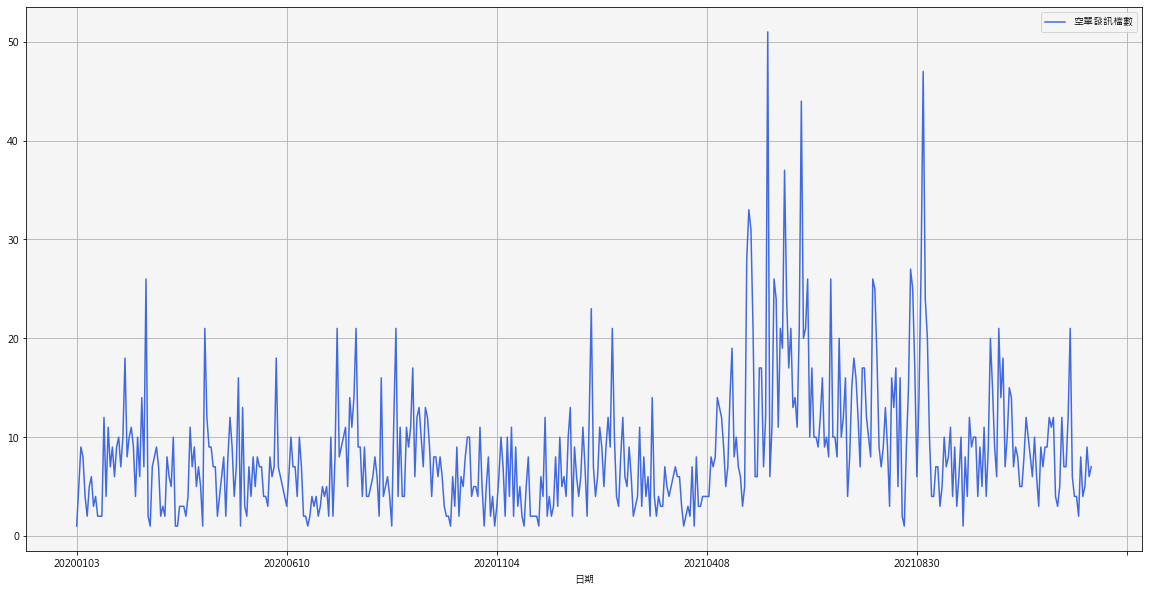

In [171]:
pd.DataFrame(returns_short.groupby('日期')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).plot(figsize=(20, 10),color = ['royalblue'],grid = True)

In [172]:
pd.DataFrame(pd.DataFrame(returns_short.groupby('日期')['symbol'].count()).rename(columns={'symbol':'空單發訊檔數'}).mean()).rename(columns = {0:'空單'}).rename({'空單發訊檔數':'每日平均發訊檔數'}).T

,每日平均發訊檔數
空單,8.590909


**<font  size=4>空單勝率</font>**

In [173]:
pd.concat([pd.DataFrame.from_dict({'空單勝率':len(returns_short[returns_short['returns(加成本0.15%)']>0])/len(returns_short)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'空單勝率':len(returns_short[returns_short['returns(加成本0.335%)']>0])/len(returns_short)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'空單勝率':len(returns_short[returns_short['returns(加成本0.435%)']>0])/len(returns_short)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])


,空單勝率
勝率(加成本0.15%),0.578403
勝率(加成本0.335%),0.557239
勝率(加成本0.435%),0.542809


In [52]:
pd.concat([pd.DataFrame.from_dict({'空單每日平均勝率':len(returns_short_day[returns_short_day['策略空單收益(0.15%成本)'] >0 ])/len(returns_short_day)},orient='index').rename(columns={0:'勝率(加成本0.15%)'}).T,
pd.DataFrame.from_dict({'空單每日平均勝率':len(returns_short_day[returns_short_day['策略空單收益(0.335%成本)'] >0 ])/len(returns_short_day)},orient='index').rename(columns={0:'勝率(加成本0.335%)'}).T,
pd.DataFrame.from_dict({'空單每日平均勝率':len(returns_short_day[returns_short_day['策略空單收益(0.435%成本)'] >0 ])/len(returns_short_day)},orient='index').rename(columns={0:'勝率(加成本0.435%)'}).T])

,空單每日平均勝率
勝率(加成本0.15%),0.632231
勝率(加成本0.335%),0.586777
勝率(加成本0.435%),0.559917


**<font  size=4>空單損益
</font>**

<AxesSubplot: ylabel='Frequency'>

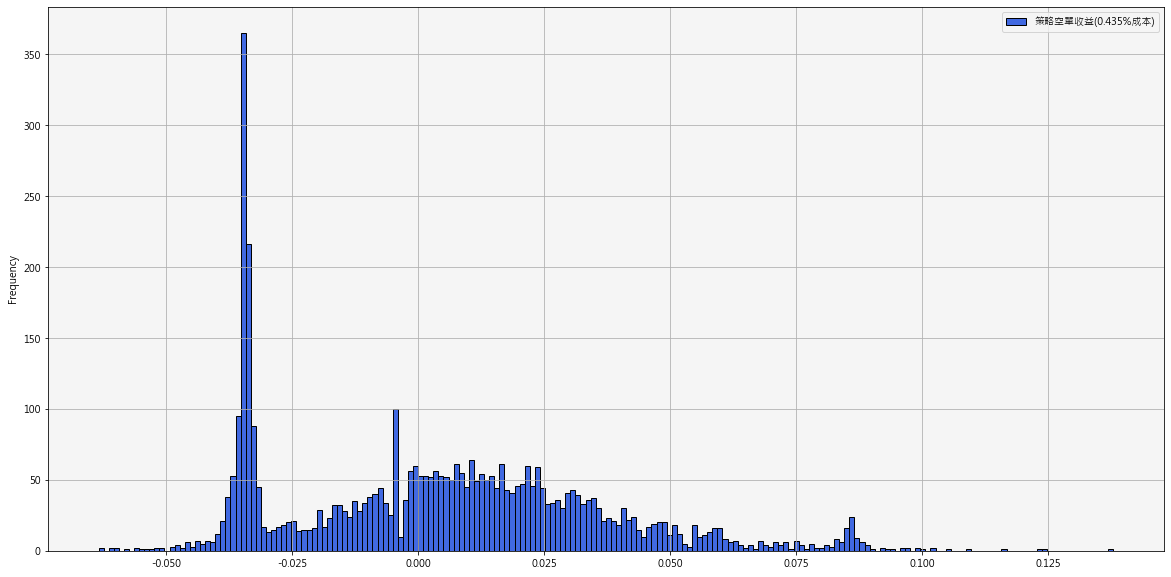

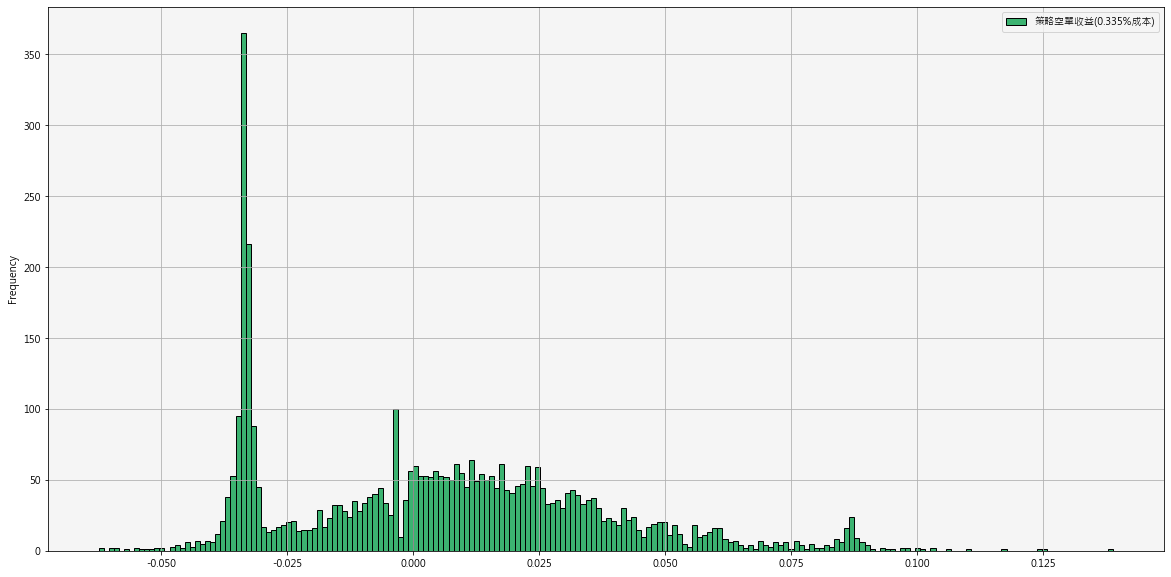

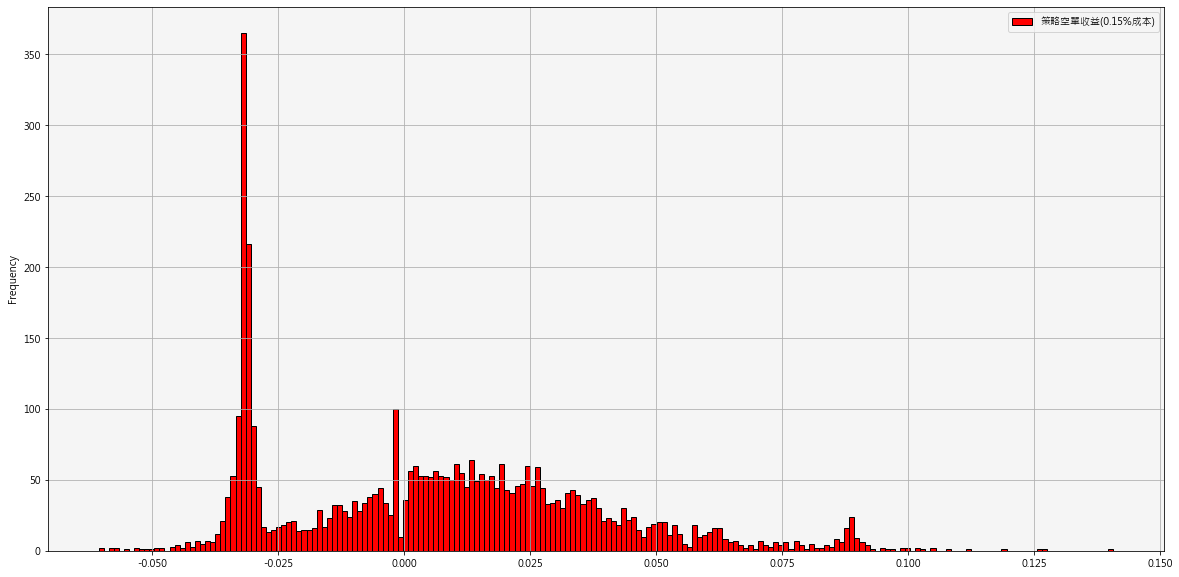

In [174]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_short[['策略空單收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_short[['策略空單收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_short[['策略空單收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [175]:
returns_short[['策略空單收益(0.435%成本)','策略空單收益(0.335%成本)','策略空單收益(0.15%成本)']].describe().iloc[1:,:]

,策略空單收益(0.435%成本),策略空單收益(0.335%成本),策略空單收益(0.15%成本)
mean,0.003577,0.004577,0.006427
std,0.031472,0.031472,0.031472
min,-0.063467,-0.062467,-0.060617
25%,-0.027922,-0.026922,-0.025072
50%,0.003350,0.004350,0.006200
75%,0.023627,0.024627,0.026477
max,0.137838,0.138838,0.140687


<AxesSubplot: ylabel='Frequency'>

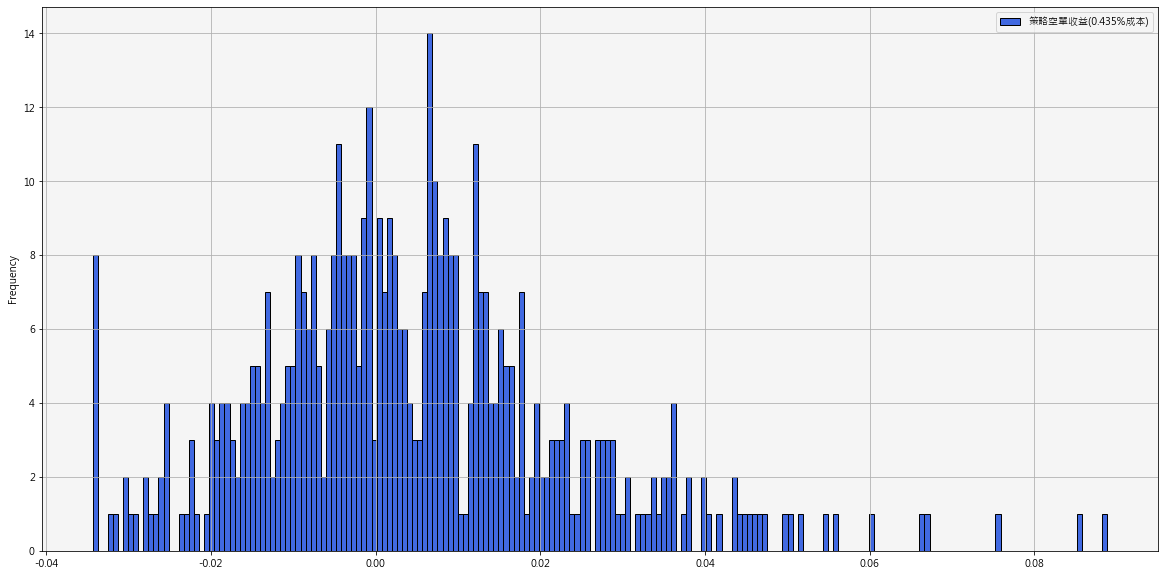

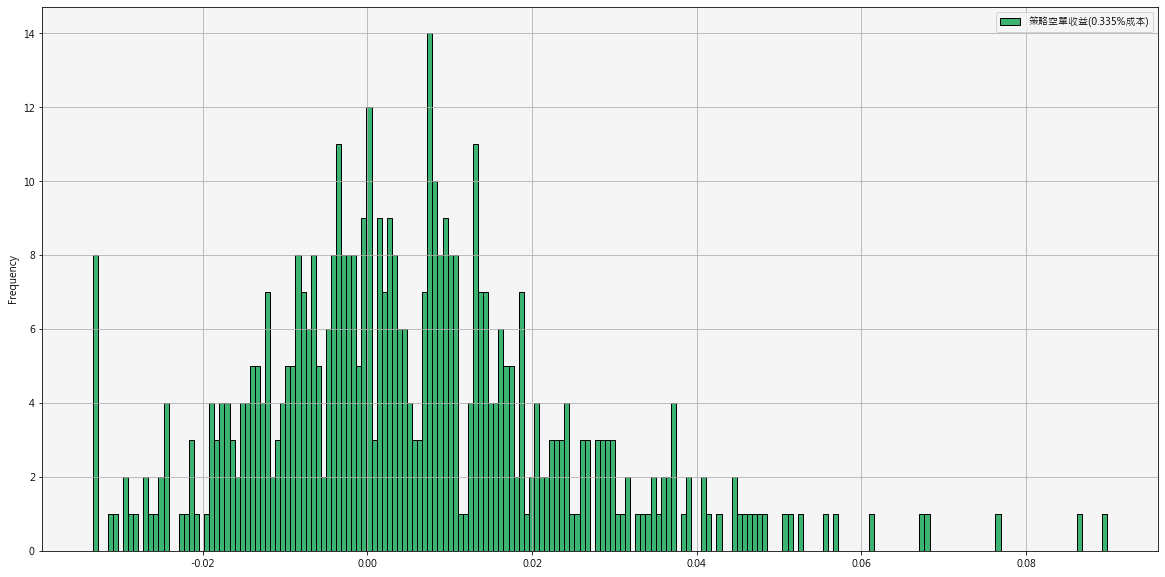

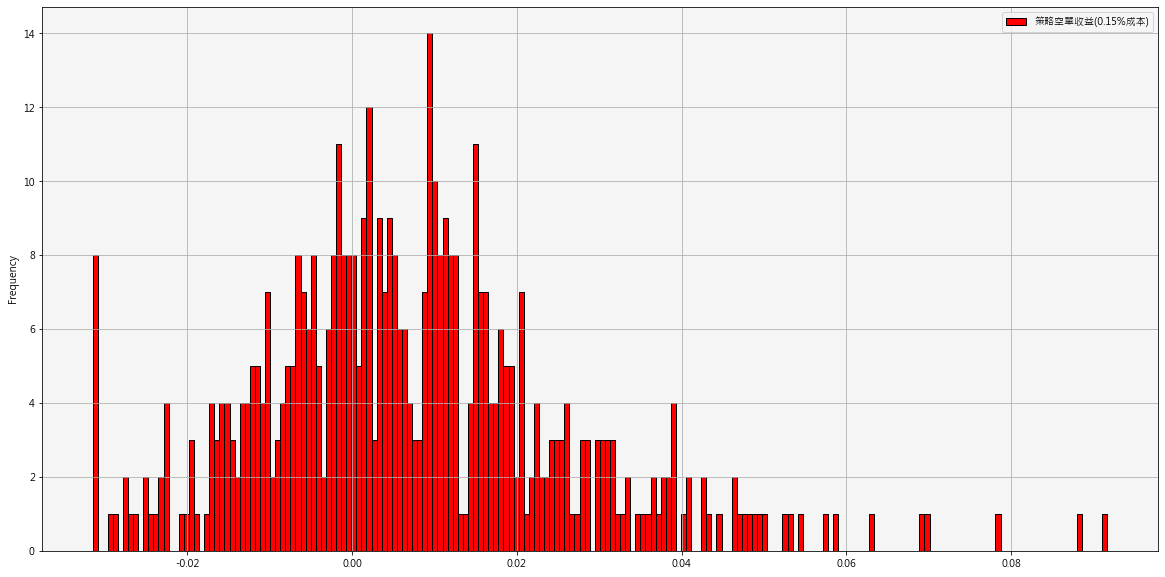

In [176]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_short_day[['策略空單收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_short_day[['策略空單收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_short_day[['策略空單收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [177]:
returns_short_day[['策略空單收益(0.435%成本)','策略空單收益(0.335%成本)','策略空單收益(0.15%成本)']].describe().iloc[1:,:]

,策略空單收益(0.435%成本),策略空單收益(0.335%成本),策略空單收益(0.15%成本)
mean,0.004374,0.005374,0.007224
std,0.018884,0.018884,0.018884
min,-0.034359,-0.033359,-0.031509
25%,-0.007690,-0.006690,-0.004840
50%,0.002327,0.003327,0.005177
75%,0.013508,0.014508,0.016358
max,0.088820,0.089820,0.091670


<AxesSubplot: xlabel='日期'>

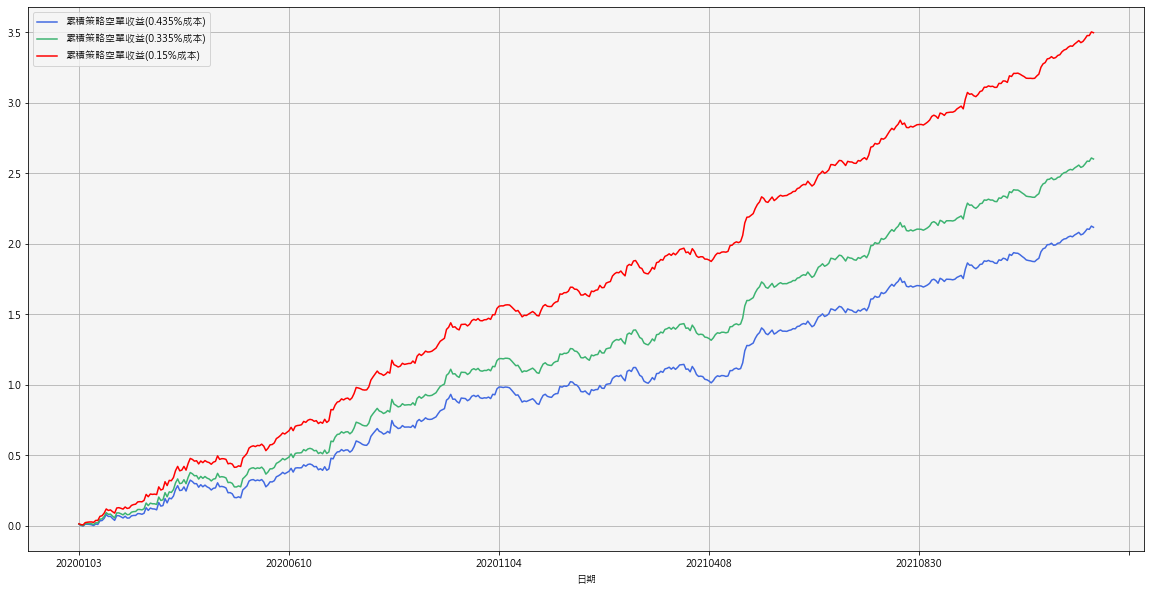

In [178]:
returns_short_day[['累積策略空單收益(0.435%成本)','累積策略空單收益(0.335%成本)','累積策略空單收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

In [179]:
make_stats(returns_short_day,returns_short,'策略空單收益')

2020年                                   \
                    策略空單收益(0.435%成本) 策略空單收益(0.335%成本) 策略空單收益(0.15%成本)   
年化收益                        157.88 %         231.45 %        426.96 %   
累積收益                        148.37 %         216.06 %        393.32 %   
年化波動度                        31.02 %          31.02 %         31.02 %   
夏普比率                         3.21172         4.024056        5.526879   
Calmar 比率                  13.084487        22.534469       51.657389   
穩定度                         0.966617         0.977693        0.987578   
最大回撤                        -12.07 %         -10.27 %         -8.27 %   
Omega 比率                     1.74716         2.022677         2.66075   
Sortino 比率                  6.289194         8.314166        12.64558   
偏度                          0.880286         0.880286        0.880286   
峰度                          1.751603         1.751603        1.751603   
尾部比率                        1.567043         1.671877        1.890236   
Daily value at risk          -3.51 %          -3.41 %         -3.23 %   
總交易次數                           1490             1490            1490   
勝率                           53.22 %           54.7 %         57.38 %   

                               2021年                                   \
                    策略空單收益(0.435%成本) 策略空單收益(0.335%成本) 策略空單收益(0.15%成本)   
年化收益                        220.38 %         311.68 %        554.25 %   
累積收益                        205.91 %          289.2 %        507.26 %   
年化波動度                        28.95 %          28.95 %         28.95 %   
夏普比率                        4.174004         5.044602        6.655208   
Calmar 比率                   17.58899        27.404999       60.262806   
穩定度                         0.970203         0.979418        0.988085   
最大回撤                        -12.53 %         -11.37 %          -9.2 %   
Omega 比率                    2.032162         2.369241        3.156325   
Sortino 比率                  8.372879        10.710745       15.747609   
偏度                          0.760208         0.760208        0.760208   
峰度                          1.778643         1.778643        1.778643   
尾部比率                        1.676748         1.807185        2.085324   
Daily value at risk          -3.17 %          -3.07 %         -2.88 %   
總交易次數                           2668             2668            2668   
勝率                           54.87 %           56.3 %         58.13 %   

                                 All                                   
                    策略空單收益(0.435%成本) 策略空單收益(0.335%成本) 策略空單收益(0.15%成本)  
年化收益                        187.44 %         269.39 %        487.16 %  
累積收益                        659.78 %         1130.1 %       2895.75 %  
年化波動度                        29.98 %          29.98 %         29.98 %  
夏普比率                        3.676901         4.517518         6.07266  
Calmar 比率                  14.959738        23.686602       52.968457  
穩定度                         0.983405         0.989278        0.994241  
最大回撤                        -12.53 %         -11.37 %          -9.2 %  
Omega 比率                    1.880389         2.184274         2.89065  
Sortino 比率                  7.274527         9.443694       14.098285  
偏度                          0.822708         0.822708        0.822708  
峰度                          1.771334         1.771334        1.771334  
尾部比率                        1.604794         1.719683        1.961317  
Daily value at risk          -3.34 %          -3.24 %         -3.05 %  
總交易次數                           4158             4158            4158  
勝率                           54.28 %          55.72 %         57.86 %

**<font  size=4>組合損益
</font>**

<AxesSubplot: ylabel='Frequency'>

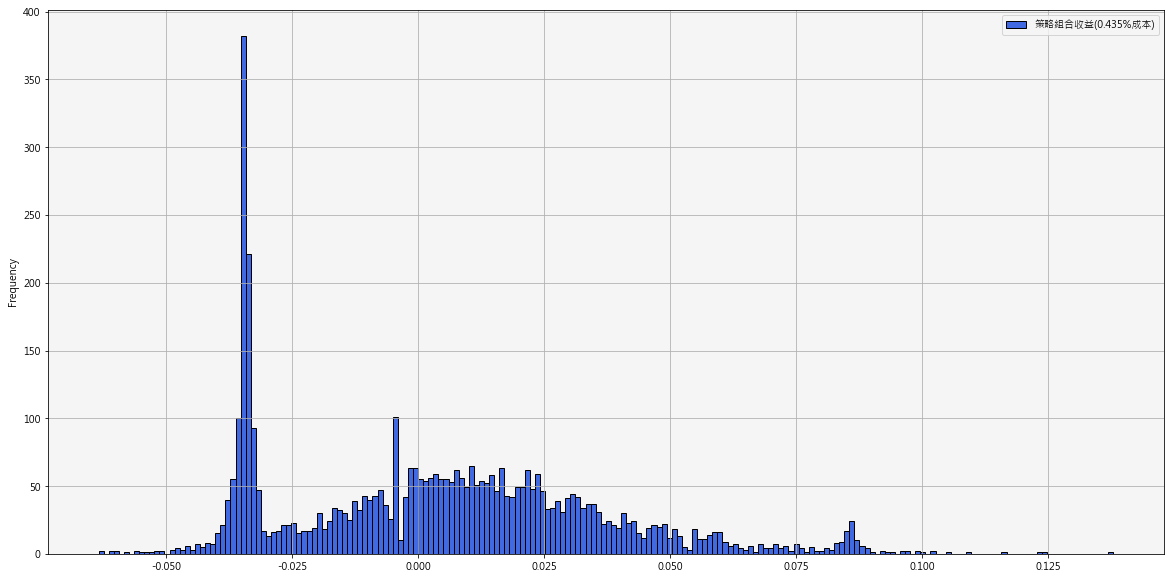

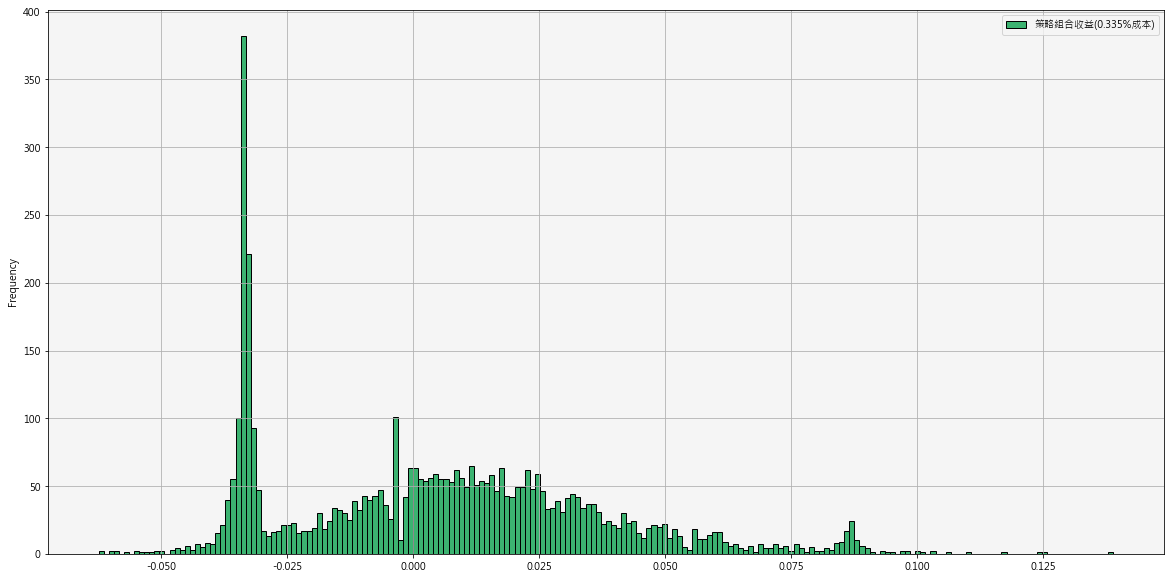

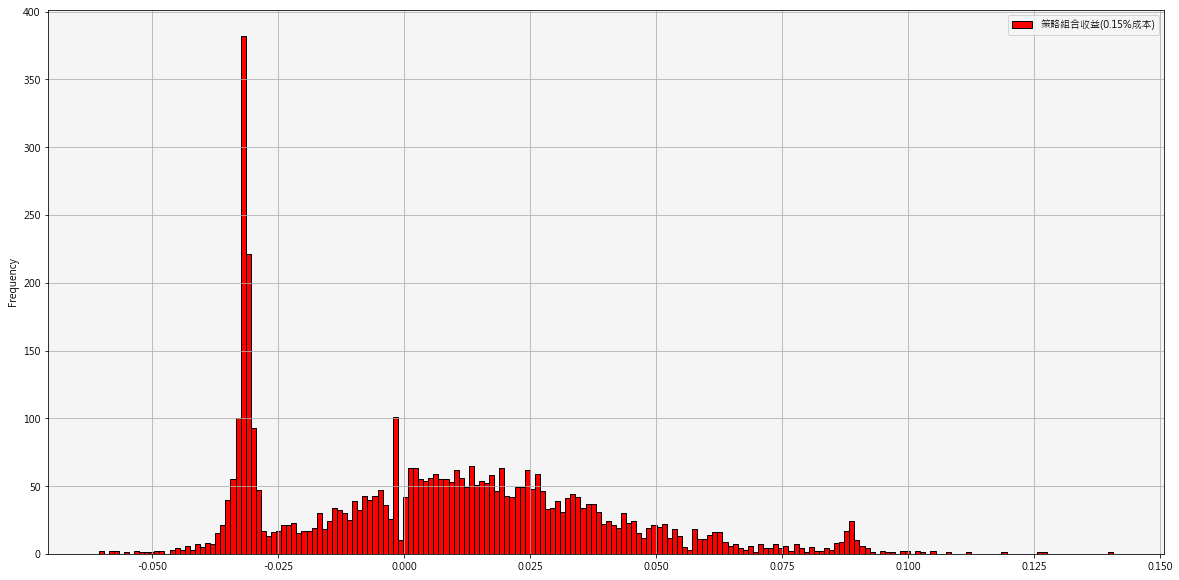

In [180]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns[['策略組合收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['策略組合收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['策略組合收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [182]:
returns[['策略組合收益(0.435%成本)','策略組合收益(0.335%成本)','策略組合收益(0.15%成本)']].describe().iloc[1:,:]

,策略組合收益(0.435%成本),策略組合收益(0.335%成本),策略組合收益(0.15%成本)
mean,0.003455,0.004455,0.006305
std,0.031450,0.031450,0.031450
min,-0.063467,-0.062467,-0.060617
25%,-0.027701,-0.026701,-0.024851
50%,0.003084,0.004084,0.005934
75%,0.023476,0.024476,0.026326
max,0.137838,0.138838,0.140687


<AxesSubplot: ylabel='Frequency'>

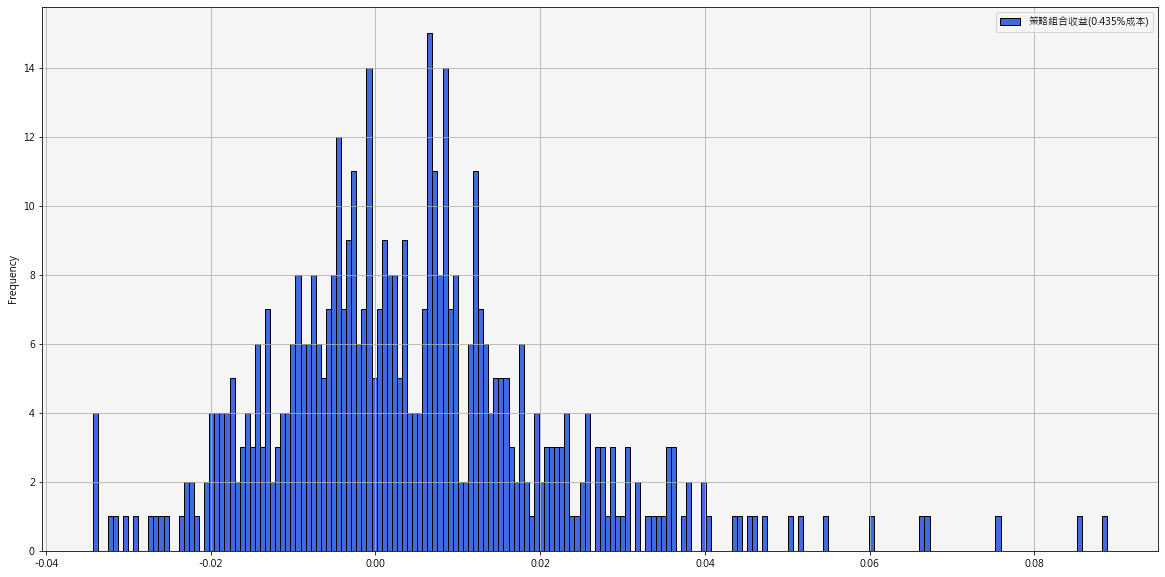

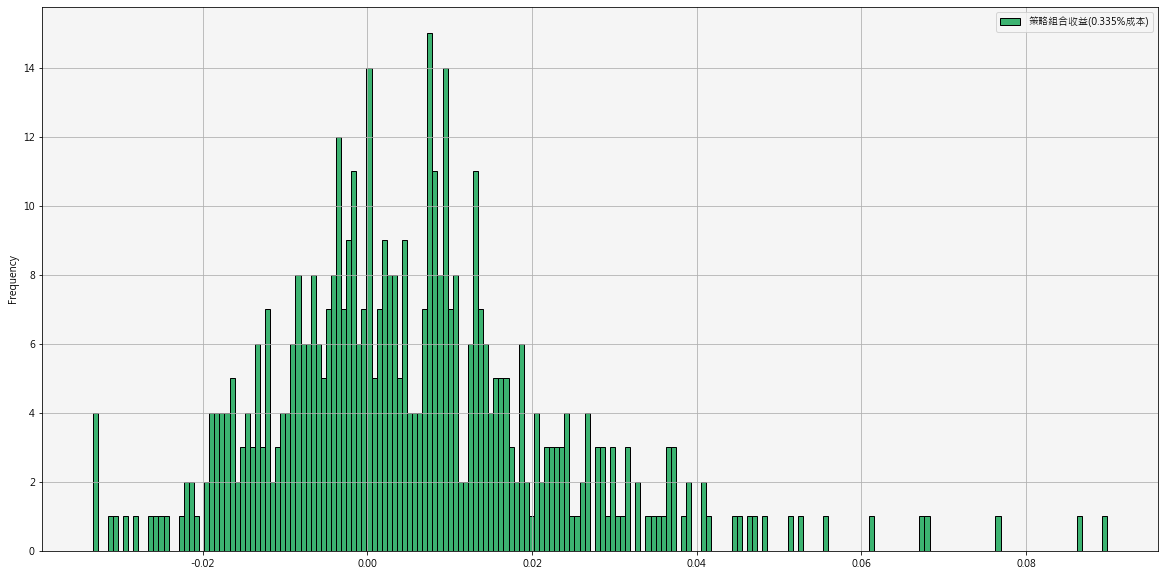

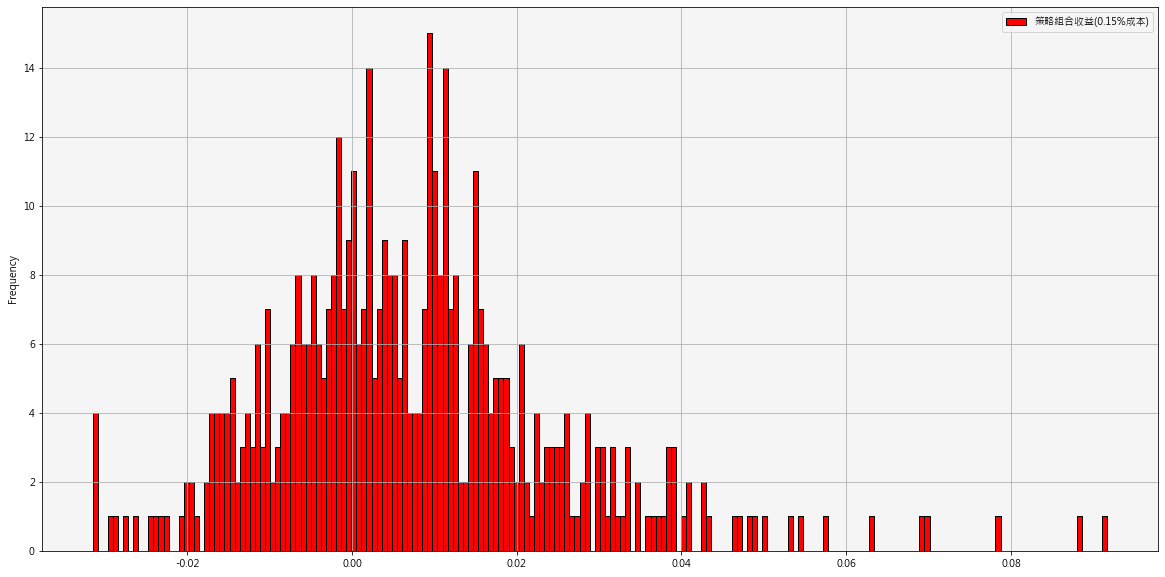

In [183]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['策略組合收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['策略組合收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['策略組合收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [184]:
returns_day[['策略組合收益(0.435%成本)','策略組合收益(0.335%成本)','策略組合收益(0.15%成本)']].describe().iloc[1:,:]

,策略組合收益(0.435%成本),策略組合收益(0.335%成本),策略組合收益(0.15%成本)
mean,0.004319,0.005319,0.007169
std,0.017399,0.017399,0.017399
min,-0.034350,-0.033350,-0.031500
25%,-0.006732,-0.005732,-0.003882
50%,0.002400,0.003400,0.005250
75%,0.012673,0.013673,0.015523
max,0.088820,0.089820,0.091670


<AxesSubplot: xlabel='日期'>

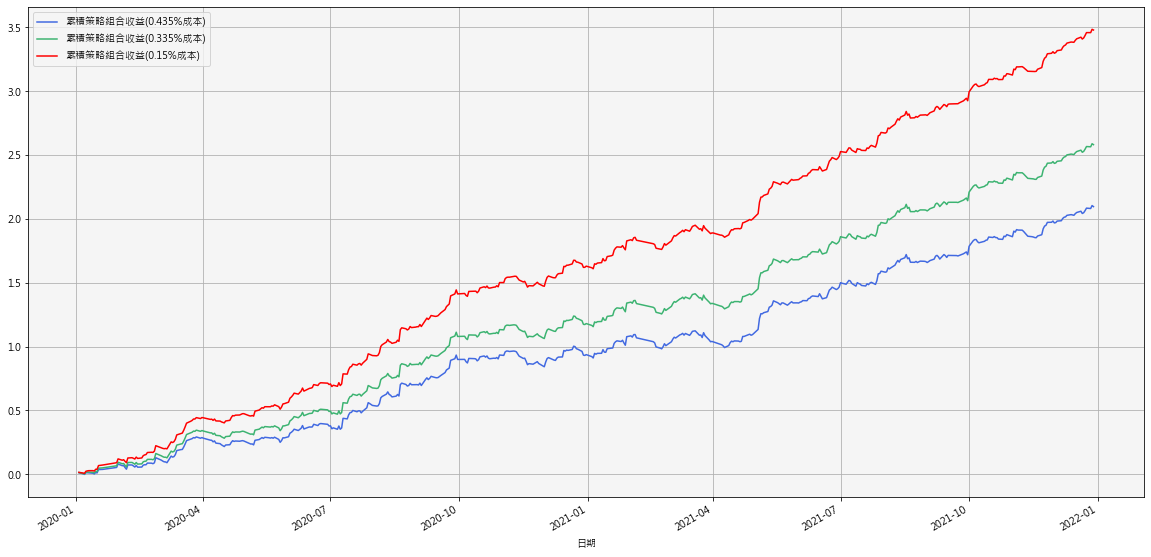

In [185]:
returns_day[['累積策略組合收益(0.435%成本)','累積策略組合收益(0.335%成本)','累積策略組合收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=3>組合各年度收益統計</font>**

In [187]:
make_stats(returns_day,returns,'策略組合收益')

2020年                                   \
                    策略組合收益(0.435%成本) 策略組合收益(0.335%成本) 策略組合收益(0.15%成本)   
年化收益                        154.42 %          227.0 %        419.88 %   
累積收益                        146.07 %         213.45 %        390.16 %   
年化波動度                        26.99 %          26.99 %         26.99 %   
夏普比率                        3.597844         4.531387        6.258441   
Calmar 比率                  13.190339        22.101125       50.801486   
穩定度                         0.958717         0.972363        0.984587   
最大回撤                        -11.71 %         -10.27 %         -8.27 %   
Omega 比率                     1.90056         2.264793         3.15965   
Sortino 比率                  7.602307        10.237626        16.07313   
偏度                          1.247456         1.247456        1.247456   
峰度                          3.527809         3.527809        3.527809   
尾部比率                        1.801034          1.96029        2.308266   
Daily value at risk          -3.02 %          -2.92 %         -2.73 %   
總交易次數                           1645             1645            1645   
勝率                           52.46 %          53.98 %         56.96 %   

                               2021年                                   \
                    策略組合收益(0.435%成本) 策略組合收益(0.335%成本) 策略組合收益(0.15%成本)   
年化收益                        220.31 %         311.59 %         554.1 %   
累積收益                        205.85 %         289.12 %        507.13 %   
年化波動度                        28.27 %          28.27 %         28.27 %   
夏普比率                        4.265937         5.157287        6.806285   
Calmar 比率                  17.583285        27.396863       60.246599   
穩定度                         0.971869         0.980573        0.988756   
最大回撤                        -12.53 %         -11.37 %          -9.2 %   
Omega 比率                    2.077727         2.435589        3.273335   
Sortino 比率                  8.677424        11.122782       16.414126   
偏度                          0.820855         0.820855        0.820855   
峰度                          2.072583         2.072583        2.072583   
尾部比率                        1.809637         1.958839        2.281188   
Daily value at risk          -3.08 %          -2.98 %          -2.8 %   
總交易次數                           2714             2714            2714   
勝率                           54.64 %          56.04 %         57.96 %   

                                 All                                   
                    策略組合收益(0.435%成本) 策略組合收益(0.335%成本) 策略組合收益(0.15%成本)  
年化收益                         185.4 %         266.78 %         483.0 %  
累積收益                         652.6 %        1119.69 %       2875.88 %  
年化波動度                        27.62 %          27.62 %         27.62 %  
夏普比率                        3.940531         4.852905        6.540797  
Calmar 比率                  14.797213        23.456518       52.516253  
穩定度                         0.981699         0.988202        0.993679  
最大回撤                        -12.53 %         -11.37 %          -9.2 %  
Omega 比率                    1.990599         2.352105        3.218616  
Sortino 比率                  8.154171        10.688332       16.228458  
偏度                          1.023253         1.023253        1.023253  
峰度                          2.727691         2.727691        2.727691  
尾部比率                        1.830488         1.984147        2.317306  
Daily value at risk          -3.05 %          -2.95 %         -2.76 %  
總交易次數                           4359             4359            4359  
勝率                           53.82 %          55.26 %         57.58 %